<center>
<img src="https://2223moodle.isel.pt/pluginfile.php/1/theme_adaptable/logo/1631635830/logo-isel_inv3.png" width="250">
<h3>Licenciatura em Engenharia Informática e Multimédia</h3><br>
Ano Letivo 2024/2025<br>
<h3>Processamento de Imagens e Visão (PIV)</h3>
<h3>Primeiro Projeto - Contagem e Classificação de Peças de Lego Retangulares</h3>


<center>
<br>
Lucas Souto <b>A50276</b><br>
Sara Marcelino <b>A50290</b><br>
Turma 52D<br><br>
Docente: Engenheiro João Costa & Pedro Mendes Jorge<br>
27 de Outubro 2024
</center>
</center>

***
<a id='section0'></a>
# <center><b>Índice</b></center><br>
 → [Introdução](#section1) <br>
 → [Metodologia](#section2) <br>
 → [Desenvolvimento](#section3) <br>
 → [Conclusão](#section6) 

***
<a id='section1'></a>
# <center><b>Introdução</b></center>

Este projeto visa desenvolver um algoritmo para detetar e contar peças retangulares de Lego colocadas sobre uma mesa, utilizando a biblioteca OpenCV em Python.

Para atingir este objetivo, o algoritmo será treinado para distinguir as peças retangulares relevantes — nos formatos “2x2”, “2x4”, “2x6” e “2x8” — de outros objetos e perturbações no campo de visão, como sombras e contacto entre peças. A partir de técnicas de binarização e segmentação de imagem, o algoritmo deve conseguir identificar contornos e propriedades que permitam uma contagem precisa e automática das peças.

Este projeto oferece, assim, uma oportunidade de explorar o uso prático da visão por computador e a familiarização com a biblioteca OpenCV (Open Source Computer Vision), uma ferramenta amplamente utilizada para o desenvolvimento de aplicações de visão por computador em tempo real. Através deste trabalho, procura-se não só explorar as técnicas de processamento de imagem, mas também aplicar conceitos fundamentais de segmentação, detecção de objetos e classificação em cenários práticos.

Nota-se que além deste ficheiro, anexamos um arquivo Python em que trabalhamos inicialmente, bem como uma interface simples para o projeto.

***
<a id='section2'></a>
# <center><b>Metodologia</b></center>

Para concretizar a tarefa de avaliar automaticamente as peças de Lego com precisão, a partir de uma pasta de imagens, seguimos uma série de etapas recomendadas pelos docentes:

‣ 1. Leitura de imagens <br>&nbsp;&nbsp;  Processámos as imagens de forma automatizada para garantir que todas as amostras fossem analisadas de uma forma uniforme.

‣ 2. Binarização <br>&nbsp;&nbsp;  Simplificámos as imagens, destacando as peças em contraste com o fundo, o que facilitou a deteção e a contagem.

‣ 3. Melhoramento da imagem <br>&nbsp;&nbsp; Reduzimos ruídos e aperfeiçoámos os contornos para assegurar a qualidade da segmentação das peças.

‣ 4. Extracção de componentes conexos <br>&nbsp;&nbsp; Identificámos cada área correspondente a uma peça, separando-a do fundo e de outros objetos.

‣ 5. Extracção de propriedades <br>&nbsp;&nbsp; Analisámos o formato e as dimensões de cada peça para identificar as medidas pretendidas (2x2, 2x4, 2x6 e 2x8).

‣ 6. Classificação de objetos <br>&nbsp;&nbsp; Contámos automaticamente as peças de Lego relevantes, ignorando objetos que não se enquadrassem nas dimensões especificadas.


***
<a id='section3'></a>
# <center><b>Desenvolvimento<b></center>

Nesta seção, iremos desenvolver o nosso projeto, delineando o nosso processo de pensamento e as metodologias que utilizamos durante o desenvolvimento do mesmo. Iremos destacar especificamente as técnicas do OpenCV que implementámos, com base na lista abrangente fornecida pelos nossos docentes. O nosso objetivo aqui é proporcionar clareza sobre a razão por trás das abordagens escolhidas e demonstrar como estas contribuíram para o sucesso geral do nosso projeto.

## 0. Imports das Bibliotecas Necessárias

Começamos rapidamente pelos imports, que incluem bibliotecas essenciais como OpenCV (cv2), NumPy e Matplotlib, sendo estas fundamentais para a manipulação e análise de imagens, bem como para a visualização dos resultados obtidos. A configuração dos parâmetros do Matplotlib (plt.rcParams) é realizada para garantir que as figuras geradas sejam de alta qualidade e legibilidade.

In [1]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
from aux_func import psColor, bwLabel
import os, math

# plt.rcParams['figure.figsize'] = [12, 24]
# plt.rcParams['figure.dpi'] = 100
plt.rcParams['figure.dpi'] = 200

Criamos um dicionário manualmente - LEGO_DATA - para comparação futura com o algoritmo que iremos desenvolver.

In [2]:
LEGO_DATA = [
    {"image": "lego01.jpg", "2x2": 3, "2x4": 3, "2x6": 0, "2x8": 1, "unidentified": 2, "total": 9},
    {"image": "lego02.jpg", "2x2": 2, "2x4": 2, "2x6": 0, "2x8": 1, "unidentified": 1, "total": 6},
    {"image": "lego04.jpg", "2x2": 2, "2x4": 1, "2x6": 0, "2x8": 0, "unidentified": 0, "total": 3},
    {"image": "lego09.jpg", "2x2": 0, "2x4": 2, "2x6": 1, "2x8": 1, "unidentified": 0, "total": 4},
    {"image": "lego10.jpg", "2x2": 0, "2x4": 1, "2x6": 0, "2x8": 1, "unidentified": 1, "total": 3},
    {"image": "lego11.jpg", "2x2": 1, "2x4": 2, "2x6": 0, "2x8": 1, "unidentified": 0, "total": 4},
    {"image": "lego12.jpg", "2x2": 0, "2x4": 0, "2x6": 0, "2x8": 0, "unidentified": 3, "total": 3},
    {"image": "lego13.jpg", "2x2": 0, "2x4": 2, "2x6": 1, "2x8": 0, "unidentified": 1, "total": 4},
    {"image": "lego21.jpg", "2x2": 1, "2x4": 1, "2x6": 1, "2x8": 1, "unidentified": 0, "total": 4},
    {"image": "lego22.jpg", "2x2": 4, "2x4": 0, "2x6": 0, "2x8": 0, "unidentified": 0, "total": 4},
    {"image": "lego23.jpg", "2x2": 0, "2x4": 4, "2x6": 0, "2x8": 0, "unidentified": 0, "total": 4},
    {"image": "lego25.jpg", "2x2": 0, "2x4": 0, "2x6": 0, "2x8": 1, "unidentified": 0, "total": 1},
    {"image": "lego30.jpg", "2x2": 1, "2x4": 1, "2x6": 2, "2x8": 0, "unidentified": 1, "total": 5},
    {"image": "lego32.jpg", "2x2": 1, "2x4": 2, "2x6": 1, "2x8": 0, "unidentified": 0, "total": 5},
]

### Variáveis de Configuração

Estas variáveis podem precisar de alterações ao serem executadas em diferentes máquinas e/ou com diferentes conjuntos de dados. Pode ser preciso rever e ajustar os valores conforme necessário para garantir a compatibilidade com a 'configuração' local.

In [3]:
# Introduzir o caminho para a pasta de imagens dentro da raw string
# Exemplo: r"C:\Users\<user>\Documents\imagens" ou r"./imagens"
# pode ser usado tanto o caminho absoluto quanto o relativo
PATH_TO_IMAGES = os.path.join(r"./treino")

# Caminho para guardar as imagens classificadas
PATH_TO_SAVE = os.path.join(PATH_TO_IMAGES, r"./output")

### Variáveis Globais

Primeiramente, começamos por delinear algumas variavéis gerais mas iremos detalhar a importância de cada uma durante futuras explicações sobre o nosso código (a medida que este evolui) e a razão pela qual foram escolhidas. 

In [4]:
PIECE_RATIOS = {
  "2x2": 1.0,   # 1:1
  "2x4": 2.0,   # 2:1
  "2x6": 3.0,   # 3:1
  "2x8": 4.0    # 4:1
}

MIN_LEGO_LENGTH_SIZE = 85

TOLERANCE = 0.25

PIECE_COUNTER = {
    "2x2 brick count": 0,
    "2x4 brick count": 0,
    "2x6 brick count": 0,
    "2x8 brick count": 0
}

## 1. Leitura das Imagens

Na função fornecida, load_image, o objetivo é carregar um ficheiro de imagem de um diretório especificado e inicializar alguns parâmetros fundamentais para o processamento de imagens. A função começa por construir o caminho do ficheiro completo utilizando os.path.join, que combina file_dir (caminho do diretório) e file_name (nome do ficheiro de imagem). Uma vez definido o caminho, a imagem é carregada utilizando cv.imread, uma função da OpenCV.

A função cv.imread é especificamente projetada para ler e carregar imagens num formato que o OpenCV consegue processar. Aqui, a função utiliza cv.IMREAD_COLOR como um flag, instruindo o OpenCV a carregar a imagem em formato colorido (como uma imagem BGR) em vez de em escala de cinzento ou qualquer outro formato. Este modo de cor lê a imagem em três canais: Azul, Verde e Vermelho, nesta ordem.

Se cv.imread não conseguir localizar ou carregar a imagem especificada, retornará None. Para lidar com isso, a função verifica se a imagem é None e, em caso afirmativo, levanta um ValueError, permitindo um feedback de erro claro caso o caminho ou o nome do ficheiro estejam incorretos ou se a imagem não puder ser carregada por qualquer motivo.

In [5]:
# Step 1: Leitura de Imagens
def load_image(file_dir, file_name):
    """ Load the image and initialize basic parameters. """
    path = os.path.join(file_dir, file_name)
    image = cv.imread(path, cv.IMREAD_COLOR)

    if image is None:
        raise ValueError(f"Image not found or unable to load: {path}")

    return image

A seguinte função (image_histogram) gera histogramas para os canais vermelho, verde e azul de uma imagem, indicando um limiar específico. Utilizámos este método para identificar quais canais serão mais eficazes para a binarização da imagem na etapa seguinte.

In [6]:
def image_histogram(image, name):
    """ Generates and displays histograms for the channels of an image and their combination. """
    red_channel = image[:, :, 0]
    green_channel = image[:, :, 1]
    blue_channel = image[:, :, 2]

    combined_rg = red_channel + green_channel

    fig, axs = plt.subplots(1, 4, figsize=(14, 2))

    fig.suptitle(f'Imagem {name}', fontsize=20)

    # Histogram for the Red channel
    axs[0].hist(red_channel.flatten(), bins=255, color='r', alpha=0.6)
    axs[0].set_title('Canal Vermelho')

    # Histogram for the Green channel
    axs[1].hist(green_channel.flatten(), bins=255, color='g', alpha=0.6)
    axs[1].set_title('Canal Verde')

    # Histogram for the Blue channel
    axs[2].hist(blue_channel.flatten(), bins=255, color='b', alpha=0.6)
    axs[2].set_title('Canal Azul')

    # Histogram for the Combined Red and Green channels
    axs[3].hist(combined_rg.flatten(), bins=510, color='purple', alpha=0.6)  
    axs[3].set_title('Canal Verde + Vermelho')

    plt.tight_layout()
    plt.show()

## 2. Binarização

A etapa de binarização serve para distinguir as peças relevantes da imagem do fundo, convertendo a imagem, inicialmente em tons de cinzento, numa imagem binária (onde cada pixel é apenas preto ou branco), facilitando a separação entre o fundo e as peças de interesse ('2x2', '2x4', '2x6', '2x8'). No nosso caso, o fundo da imagem era azul escuro, e algumas peças eram azul claro. Para esta conversão, analisámos os histogramas dos canais de cor (vermelho, verde e azul) e identificámos que os canais verde e vermelho apresentavam o melhor contraste entre as peças e o fundo, permitindo uma separação mais eficaz.

Assim, o processo de binarização começou por isolar os canais vermelho e verde da imagem. Estes foram depois combinados numa média ponderada, criando uma imagem onde as peças se destacam em relação ao fundo. Esta imagem combinada foi então suavizada com um filtro Gaussiano, que ajuda a reduzir ruídos que poderiam dificultar a segmentação. Em seguida, aplicámos threshold.

O "threshold" é uma técnica de segmentação de imagens que separa pixels em duas categorias: preto e branco. Através de um valor limite definido, os pixels com intensidade acima desse valor são classificados como brancos, enquanto os abaixo são classificados como pretos. Esta técnica é especialmente eficaz quando há uma clara diferença de intensidade luminosa entre o objeto de interesse e o fundo. A escolha do tipo de thresholding é crucial, pois influencia diretamente a precisão da segmentação.

Considerámos vários tipos de thresholding, como o THRESH_BINARY, que define pixels acima do valor de limiar como o valor máximo (255, branco) e os que estão abaixo como 0 (preto). Este método é simples e eficiente para imagens com um contraste forte e claro entre o objeto e o fundo. O THRESH_BINARY_INV, por sua vez, inverte esse processo: os pixels acima do limiar são convertidos para 0 (preto), e os abaixo para 255 (branco), sendo útil em imagens onde o objeto é escuro e o fundo é claro. O THRESH_OTSU é uma técnica adaptativa que calcula automaticamente o valor do limiar ótimo, analisando a distribuição de intensidades na imagem. O objetivo é minimizar a variância intraclasse, ou seja, o desvio entre os valores de intensidade do objeto e do fundo. Este método é especialmente útil para imagens com histogramas de intensidade bimodais (dois picos, um do fundo e outro do objeto).

Como dito, percebemos (com os histogramas) que havia uma separação clara entre as intensidades do fundo e das peças de Lego. O método de Otsu foi o escolhido, pois ajusta automaticamente o valor do limiar ao observar esses dois picos de intensidade. Com isso, o Otsu consegue um valor ideal que maximiza a separação entre as peças e o fundo, melhorando a precisão da segmentação sem necessidade de experimentação manual de valores de limiar.

Embora a utilização do espaço de cor HSV pudesse ser mais eficiente neste contexto, esta abordagem não foi permitida neste projeto. Em teoria, o HSV é vantajoso porque permite separar a matiz (cor) da luminosidade, o que facilitaria a distinção entre o azul escuro do fundo e o azul claro das peças. No canal de matiz (H), poderíamos isolar o azul, enquanto a saturação e o valor (intensidade de luz) ajudariam a separar o azul escuro do claro. Com HSV, a segmentação poderia ser mais estável, especialmente em ambientes com variações de luz.

In [7]:
# Step 2: Binarização
def binarize_image(image, thresh = 127, thresh_type = cv.THRESH_OTSU):
    """ Split the image and binarize the red and green channels together. """

    _, img_green, img_red =  cv.split(image)
    combined = cv.addWeighted(img_red, .5, img_green, .5, 0)
    blured = cv.GaussianBlur(combined, (5, 5), 0)

    str_elemr, bw = cv.threshold(blured, thresh, 255, thresh_type)
    return str_elemr, bw

## 3. Melhoramento da Imagem

O melhoramento da imagem é uma etapa fundamental em muitos processos de análise de imagens, permitindo melhorar a qualidade e a legibilidade das características desejadas. No nosso caso, utilizámos operações morfológicas para aprimorar a imagem binária resultante da binarização. As operações morfológicas são técnicas utilizadas em processamento de imagens para modificar a estrutura de objetos numa imagem binária. Baseiam-se na forma e na disposição dos pixels, permitindo, por exemplo, remover ruídos, preencher buracos, unir áreas próximas ou separar objetos que se tocam.

A função cv.getStructuringElement do OpenCV é utilizada para criar um elemento estruturante. O tipo de elemento estruturante pode ser definido como uma forma específica (por exemplo, retângulo, círculo, elipse) - retângulo foi o escolhido neste caso - e o seu tamanho é determinado pelo parâmetro ksize. Escolhemos o valor 3 para este porque as peças de Lego no nosso conjunto de imagens apresentavam uma disposição em que algumas estavam próximas ou até se tocavam. Um elemento estruturante pequeno, como o de 3x3 pixels, foi uma escolha estratégica para evitar a união de áreas que deveriam permanecer separadas. Com um elemento estruturante pequeno, conseguimos preservar os contornos e a individualidade de cada peça, permitindo que fossem analisadas de forma distinta, mesmo quando estavam adjacentes. Se tivéssemos optado por um elemento estruturante maior, poderíamos acabar por unir as partes das peças que se encontravam próximas, comprometendo a precisão da segmentação e dificultando a identificação correta de cada peça. 

A função cv.morphologyEx aplica uma operação morfológica complexa na imagem. Neste caso, foi utilizada a operação de fechamento (cv.MORPH_CLOSE), que combina uma dilatação seguida de uma erosão. Esta técnica é eficaz para preencher pequenos buracos e unir áreas próximas. O fechamento é especialmente útil em imagens onde se deseja preservar a forma dos objetos, enquanto se eliminam pequenos detalhes indesejados.

Finalmente, optou-se por utilizar uma outra operação de erosão (cv.erode). A erosão remove pixels da borda dos objetos, ajudando a eliminar ruídos e a afinar as estruturas. Ao aplicar a erosão, os contornos das peças tornam-se mais definidos, facilitando a segmentação e a identificação das peças individuais. Esta operação é particularmente eficaz quando se pretende separar objetos que possam estar próximos, evitando que se juntem durante o processamento. A dilatação (cv.dilate), por outro lado, é a operação oposta à erosão, na qual se adicionam pixels às bordas dos objetos. Embora a dilatação possa ser útil para preencher buracos maiores e unir áreas distantes, não foi utilizada neste caso, pois poderia comprometer a individualidade das peças. Em situações em que as peças se tocam, a dilatação poderia causar a fusão de áreas que devem permanecer separadas, reduzindo a precisão da segmentação.


Mesmo assim, observou-se que esta última erosão não era suficiente para garantir a separação desejada das peças. A adição de outras operações morfológicas poderia comprometer a qualidade da imagem e a definição dos contornos. Por isso, foi decidido aplicar uma abordagem diferente (que irá ser mencionada futuramente) para realizar uma separação final das peças que possam ter ficado unidas.

In [8]:
# Step 3: Melhoramento da Imagem
def enhance_image(bw, str_elemr, struct_size = 3):
    """ Apply morphological enhancement to the binary image. """

    ksize = (struct_size, struct_size)
    str_elem = cv.getStructuringElement(cv.MORPH_RECT, ksize)
    bw_morph = cv.morphologyEx(bw, cv.MORPH_CLOSE, str_elem, iterations=1)
    
    enhanced_image = cv.erode(bw_morph, str_elem, iterations=1)
        
    return enhanced_image

## 4. Extracção de Componentes Conexos

Na processamentação de imagens, o conceito de extracção de componentes conexos envolve a identificação e isolamento de objetos ou regiões distintos dentro de uma imagem binária (uma imagem onde cada pixel é preto ou branco). A análise de componentes conexos ajuda a rotular regiões contíguas distintas numa imagem, o que é particularmente útil para detectar objetos individuais, analisar formas e medir propriedades de regiões. Neste processo, pixels vizinhos que partilham características semelhantes (como a intensidade do pixel) são agrupados como parte do mesmo componente. Esta técnica tem aplicações no reconhecimento de objetos, análise de formas e segmentação na visão computacional.

A função label_regions rotula estas regiões conectadas utilizando a função connectedComponentsWithStats da OpenCV. Esta função retorna o número de componentes, uma matriz rotulada que indica cada região, e dados adicionais como área, caixa delimitadora e coordenadas do centróide para cada componente. A função filtra componentes menores do que um limite especificado, reduzindo o ruído, e cria uma imagem pseudo-colorida para diferenciar visualmente cada componente.

A função detect_pieces utiliza a função findContours da OpenCV para localizar e retornar os contornos, ou limites, dos objetos dentro da imagem binária. Esta função traça os limites externos dos objetos, sendo útil para identificar peças distintas na imagem. Ao usar a flag cv.RETR_EXTERNAL, foca-se apenas nos contornos externos, e cv.CHAIN_APPROX_SIMPLE optimiza o uso de memória ao armazenar apenas os pontos essenciais ao longo dos contornos. Juntas, estas funções permitem uma identificação e análise eficazes de objetos e regiões distintas numa imagem binária.

In [9]:
def label_regions(bw, thresh=127):
    """ Label connected components and create a pseudo-colored image """
    num_labels, labels, stats, centroids = cv.connectedComponentsWithStats(bw)
    
    valid_contours = []
    for i in range(1, num_labels):  
        if stats[i, cv.CC_STAT_AREA] > thresh:  # Adjust threshold as needed
            valid_contours.append(labels == i)
    
    color_map = psColor.CreateColorMap(num_labels, 1)
    pseudo_colored_img = psColor.Gray2PseudoColor(labels, color_map)
    
    return num_labels, pseudo_colored_img

def detect_pieces(image):
    """ Find contours in the eroded binary image """
    contours, _ = cv.findContours(image, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
    return contours

## 5. Extracção de Propriedades

"Extracção de Propriedades" envolve a identificação de características-chave dos objetos dentro de uma imagem, como tamanho, forma e posição. Este processo fornece informações cruciais para classificar e analisar objetos, sendo particularmente útil em dados de imagem estruturados, como deteção e categorização de componentes. 

A função does_touch_border verifica se um contorno toca a borda da imagem. Esta função utiliza o boundingRect da OpenCV, que calcula um retângulo delimitador em torno do contorno. O canto superior esquerdo do retângulo e as suas dimensões são então comparados às dimensões da imagem para verificar se alguma parte do contorno intercepta a borda da imagem. Isto é crucial para identificar componentes parciais perto da borda. A função handle_border_touch dá um passo adicional ao identificar se a altura de um componente (presumido como orientado verticalmente) está abaixo de um determinado limite, definido por MIN_LEGO_LENGTH_SIZE. Se sim, isto sugere que a peça pode estar parcialmente cortada na parte superior ou inferior. Aqui, ajustar a altura para MIN_LEGO_LENGTH_SIZE permite que a análise prossiga como se o componente estivesse completo, o que é essencial para medições precisas de peças cortadas. Isto não será possivel ser feito, se a peça estiver cortada horizontalmente visto que não temos noção de quanto da peça foi cortada uma vez que o tamanho do lado 'maior' (horizontal) poderá mudar - 2x2 ou 2x4 ou 2x6 ou 2x8.

A função is_rectangle determina se um contorno se aproxima de um retângulo, avaliando a forma com base tanto nos vértices (que terão que ser 4) como na razão de aspeto. Utiliza arcLength, que calcula o perímetro do contorno, seguido por approxPolyDP, que aproxima a forma do contorno com base em um fator de tolerância, epsilon. O valor de epsilon é definido como um baixo 3% do perímetro (0,03) para garantir que a aproximação seja precisa, capturando a forma do retângulo sem simplificações excessivas. Um epsilon mais baixo produz um ajuste mais próximo à forma original, o que é necessário ao verificar a estrutura retangular de um contorno. Finalmente, polylines é utilizada para sobrepor visualmente o retângulo aproximado na imagem, proporcionando uma referência rápida para verificar as formas dos contornos.

A função auxiliar distance calcula a distância Euclidiana entre dois pontos, ajudando nos cálculos de tamanho e espaçamento para diferentes componentes. Cada uma destas funções contribui com métricas específicas para a extracção e classificação dos componentes da imagem, permitindo análises mais fiáveis de objetos parcialmente visíveis e completos.

In [10]:
def does_touch_border(contour, img_width, img_height):
    """ Check if the contour touches the border of the image """
    x_min, y_min, w_rect, h_rect = cv.boundingRect(contour)
    touches_border = (x_min <= 0 or y_min <= 0 
                      or x_min + w_rect >= img_width 
                      or y_min + h_rect >= img_height)
    return touches_border

def handle_border_touch(contour, img_width, img_height):
    """ Check if the piece touches the border and adjust height if needed. """
    if does_touch_border(contour, img_width, img_height) and img_height < MIN_LEGO_LENGTH_SIZE:
        img_height = MIN_LEGO_LENGTH_SIZE
        return True, img_height
    return False, img_height

def is_rectangle(image, contour):
    """ Check if a contour is rectangular based on aspect ratio and vertices. """
    epsilon = 0.03
    perimeter = cv.arcLength(contour, True) 
    approx = cv.approxPolyDP(contour, epsilon * perimeter, True)
    cv.polylines(image, approx, True, [255, 0, 255], 3)
    return len(approx) == 4

def distance(point1, point2):
    return math.sqrt((point1[0] - point2[0])**2 + (point1[1] - point2[1])**2)

A função detect_and_split_merged_pieces é projetada para identificar e separar peças "fundidas" numa imagem, onde dois ou mais objetos podem ser erroneamente detetados como uma única entidade devido à sua proximidade ou limites sobrepostos. Ao utilizar envoltórios convexos e defeitos de convexidade, a função procura encontrar pontos côncavos significativos ao longo do contorno, indicando onde os objetos poderiam potencialmente se separar.

Para começar, a função calcula o envoltório convexo do contorno utilizando cv.convexHull. Isto cria o menor polígono que pode envolver o contorno, suavizando quaisquer curvas internas. Ao definir returnPoints=False, a função recupera apenas os índices dos pontos do contorno que constituem o envoltório, os quais são necessários para cálculos posteriores. Em seguida, cv.convexityDefects é utilizada para identificar pontos ao longo do contorno que se desviam do envoltório convexo, conhecidos como "defeitos de convexidade." Cada defeito é composto por um ponto de início, um ponto final e um ponto "longe" (o ponto com a profundidade máxima em relação ao envoltório), juntamente com um valor de profundidade d. Valores de profundidade grandes significam áreas côncavas proeminentes, sugerindo potenciais pontos de separação entre os objetos fundidos.

Se forem encontrados defeitos de convexidade, a função recolhe os seus valores de profundidade numa lista chamada d_values e calcula um limiar com base na mediana destes valores, escalado por um fator definido por thresh_mod. Este limiar ajuda a filtrar pontos côncavos menos significativos, focando apenas aqueles que são propensos a indicar separações significativas. Para cada defeito com uma profundidade que excede este limiar, a função marca o ponto "longe" do defeito na imagem desenhando um círculo vermelho. Estes pontos marcados representam as indentitações mais pronunciadas no contorno, destacando potenciais áreas para separação.

Para além de separar as peças fundidas, a função itera através de pares de pontos de defeito para identificar aqueles que estão próximos o suficiente para justificar uma linha de separação. A distância Euclidiana entre os pares de pontos de defeito é calculada utilizando uma função auxiliar chamada distance. Se a distância entre dois pontos for menor do que uma distância mínima pré-definida (definida como 15 pixels), a função considera estes pontos como limites para uma separação e desenha uma linha preta entre eles na imagem aumentada. Esta representação visual simula um corte que separa as peças e continua até todos os pares de defeitos serem processados.

As principais funções da OpenCV utilizadas neste processo incluem cv.convexHull, que determina o limite convexo em torno do contorno; cv.convexityDefects, que identifica pontos côncavos significativos ao longo do contorno; cv.circle, que marca os pontos de defeito na imagem; e cv.line, que conecta visualmente os pares de pontos de defeito para indicar onde as peças devem ser separadas. Este método efetivamente evita que peças fundidas sejam incorretamente contadas como um único objeto, melhorando assim a precisão da deteção de objetos em tarefas de processamento de imagem.




In [11]:
def detect_and_split_merged_pieces(image, contour, enhanced_image):
    """ Checks for merged pieces and splits them if needed. """
    hull = cv.convexHull(contour, returnPoints=False)
    hull[::-1].sort(axis=0)
    defects = cv.convexityDefects(contour, hull)
    defect_points = []
    thresh_mod = 15
    
    if defects is not None:
        d_values = [defects[i, 0][3] for i in range(defects.shape[0])]
        threshold = np.median(d_values) * thresh_mod
        for i in range(defects.shape[0]):
            _, _, f, d = defects[i, 0]
            far = tuple(contour[f][0])
            if d > threshold: 
                cv.circle(image, far, 3, [0, 0, 255], -1)
                defect_points.append(far)

        while len(defect_points) > 1:
            min_distance = 15
            for i in range(len(defect_points)):
                for j in range(i + 1, len(defect_points)):
                    point1, point2 = defect_points[i], defect_points[j]
                    dist = distance(point1, point2)
                    if dist < min_distance:
                        min_distance = dist
                        cv.line(enhanced_image, point1, point2, 0, 3)
            defect_points.remove(point1)
            defect_points.remove(point2)
            
    return image, contour, enhanced_image

Nota-se que, em teoria, o algoritmo Watershed poderia ser usado para separar peças misturadas numa imagem. Esta técnica de segmentação de imagens vê a imagem em escala de cinzentos como uma superfície topográfica, onde os valores de intensidade dos pixels representam a altura. O algoritmo simula a inundação dessa superfície, identificando 'bacias' que correspondem a objetos distintos. Quando a inundação atinge as linhas de watershed (ou cristas), o algoritmo segmenta a imagem em regiões separadas, distinguindo assim os objetos sobrepostos.

Para aplicar o algoritmo Watershed na separação de peças mescladas, normalmente começamos com etapas de pré-processamento. Isto envolve converter a imagem para escala de cinzentos e usar técnicas como limiarização binária ou deteção de bordas para destacar os contornos dos objetos. Depois, precisamos criar marcadores para os objetos individuais, o que pode ser feito através de operações morfológicas ou análise de componentes conectados. Uma vez que os marcadores estão estabelecidos, podemos aplicar o algoritmo Watershed, permitindo que a inundação simulada preencha as bacias até que elas se encontrem nas linhas de watershed, resultando em segmentos distintos de objetos que estavam mesclados.

Apesar de ser eficaz, decidimos não usar o algoritmo Watershed, porque parecia uma "saída fácil" e não constar na lista dada pelos docentes. A implementação do Watershed pode ser intensiva em termos computacionais e muitas vezes exige um ajuste cuidadoso dos parâmetros para resultados ótimos. Em contraste, a nossa abordagem com defeitos de convexidade permite-nos usar diretamente a geometria dos contornos para identificar pontos de separação. Esta abordagem pareceu dar mais controlo sobre o processo e permite personalizar de acordo com as características dos nossos dados, levando a resultados mais eficientes e claros.

## 6. Classificação de Objetos

A seção Classificação de Objetos do código concentra-se em classificar as peças detectadas numa imagem com base nas suas propriedades geométricas, principalmente nas suas proporções e áreas. Esta classificação é essencial para identificar com precisão diferentes tipos de objetos dentro da imagem, particularmente em contextos como a análise de peças de LEGO ou itens estruturados semelhantes. As funções dentro desta seção trabalham em conjunto para determinar o tipo de peça mais próximo, validar a área do contorno e classificar a peça com base nas suas características.

A função get_piece_type determina o tipo de peça mais próximo ao comparar a proporção calculada do contorno com as proporções predefinidas armazenadas no dicionário PIECE_RATIOS. Estes ratios foram feitos em base do lado mais pequeno (2) que é semelhante para todas as peças (com um ligeiro desvio - tolerância). Com isto achamos uma forma fácil e eficaz de saber os valores teóricos da aréa e do perimetro - algo util para o decorrer do algoritmo. 

## Valores Téoricos:

### area = side x side x ratio
### perimeter = 4 x side x ratio

![ratios](./report_picts/ratios.png)

A função itera através de cada tipo de peça e a sua proporção correspondente, utilizando uma tolerância definida (0.2) para permitir ligeiras variações na proporção, visto que os valores calculados por nós são teoricos e poderá haver alguma distinção (sombras, etc.). Se a proporção calculada estiver dentro da faixa de tolerância e o contorno for confirmado como retangular (verificado pela função is_rectangle), o tipo de peça mais próximo é identificado. Esta classificação é vital para atribuir tipos de objetos de forma precisa, o que ajuda nas análises e tomadas de decisão subsequentes.

Para garantir que apenas peças válidas sejam consideradas, a função check_valid_area avalia se a área do contorno se encontra dentro de limites aceitáveis. Isto é feito calculando a área utilizando a função cv.contourArea da OpenCV, que calcula a área encerrada pelo contorno. A função recupera os limites mínimo e máximo através da função get_min_max_ratios, que extrai estes valores do dicionário PIECE_RATIOS. Em seguida, calcula as áreas mínima e máxima permitidas com base num tamanho mínimo predefinido (MIN_LEGO_LENGTH_SIZE) e tolerância utilizando a função calc_area. Este passo de validação é crucial para filtrar ruídos ou contornos irrelevantes que não atendem aos critérios de tamanho, garantindo que apenas peças válidas sejam classificadas.

Na função classify_piece, o processo de classificação da peça é consolidado. Se o contorno não for retangular, a função chama detect_and_split_merged_pieces, que trata quaisquer peças fundidas que possam ter sido detectadas como um único objeto. Isto assegura que a classificação seja baseada em peças distintas e individuais. Após confirmar a validade do contorno através de check_valid_area, a área e dimensões da peça são calculadas. A função cv.minAreaRect da OpenCV é utilizada para obter o retângulo de área mínima que pode encerrar o contorno, o que fornece a largura, altura e ângulo da peça. Este passo é importante para determinar com precisão as dimensões da peça, especialmente se não estiver perfeitamente alinhada com os eixos de coordenadas.

A proporção é então calculada como a largura dividida pela altura ajustada (obtida através de handle_border_touch, que ajusta a altura se a peça tocar na borda da imagem). O tipo de peça é determinado chamando a função get_piece_type, que utiliza o método discutido anteriormente para corresponder a proporção à peça mais próxima. Se a peça tocar na borda, ela é classificada como "Desconhecida," sendo o tipo previamente identificado anotado para referência. Esta classificação fornece uma forma útil de gerenciar e identificar peças que podem estar cortadas ou visíveis parcialmente.

Por fim, a função detect_and_classify orquestra o processo geral de deteção e classificação. Detecta contornos na imagem aumentada utilizando a função detect_pieces, que utiliza o método cv.findContours da OpenCV para encontrar e retornar os contornos dos objetos na imagem binária. Para cada contorno detectado, a função chama classify_piece para recolher e armazenar informações sobre peças válidas, retornando, em última análise, uma lista de peças classificadas. Esta abordagem sistemática assegura que cada peça seja analisada e categorizada com precisão com base nas suas propriedades geométricas, contribuindo para uma análise eficaz da imagem e reconhecimento de objetos.

In [12]:
def get_piece_type(image, contour, aspect_ratio):
    """ Determine the closest piece type based on aspect ratio """
    closest_piece = "Unknown"
    for piece, ratio in PIECE_RATIOS.items():
        if (abs(aspect_ratio - ratio) < TOLERANCE
            and is_rectangle(image, contour)): 
            closest_piece = piece
            break
    return closest_piece

def get_min_max_ratios():
    """ Get the smallest and largest ratios from the piece_ratios dictionary """
    min_ratio = min(PIECE_RATIOS.values())
    max_ratio = max(PIECE_RATIOS.values())
    return min_ratio, max_ratio

def calc_area(min_size, ratio, tolerance):
    return np.power(min_size, 2) * ratio * tolerance

def check_valid_area(contour):
    """ Check if the area of the piece is within allowed bounds based on the ratios (max and min) """
    area = round(cv.contourArea(contour))
    min_ratio, max_ratio = get_min_max_ratios()
    min_area = calc_area(MIN_LEGO_LENGTH_SIZE, min_ratio, 1 - TOLERANCE)
    max_area = calc_area(MIN_LEGO_LENGTH_SIZE, max_ratio, 1 + TOLERANCE)
    return min_area <= area <= max_area


def classify_piece(image, contour, enhanced_image):
    """ Classify each detected piece based on aspect ratio """
    if not is_rectangle(image, contour):
        image, contour, enhanced_image = detect_and_split_merged_pieces(
                                            image, contour, enhanced_image)

    if not check_valid_area(contour):
        return None

    area = cv.contourArea(contour)
    rect = cv.minAreaRect(contour)
    (x, y), (w, h), angle = rect

    if w < h:
        w, h = h, w

    if w == 0 or h == 0:
        return None

    border_touch, adjusted_height = handle_border_touch(contour, w, h)
    aspect_ratio = w / adjusted_height
    piece_type = get_piece_type(image, contour, aspect_ratio)

    if border_touch and piece_type != "Unknown":
        piece_type = f"Unknown ({piece_type})"

    return {'piece_type': piece_type,
            'aspect_ratio': aspect_ratio,
            'width': w, 'height': adjusted_height,
            'angle': angle, 'area': area,
            'center': (int(x), int(y)),
            'contour': np.int32(cv.boxPoints(rect))}

def detect_and_classify(image, enhanced_image, iterations=1):
    """ Detect contours and classify each detected piece """
    for _ in range(iterations):
        contours = detect_pieces(enhanced_image)
        pieces_info = []
        for contour in contours:
            piece_info = classify_piece(image, contour, enhanced_image)
            if piece_info:
                pieces_info.append(piece_info)
    return pieces_info


Estas funções são modificadas da função originais com nomes semelhantes em cima. O principal objetivo é facilitar a representação gráfica dos valores de área e apoiar discussões sobre os intervalos de tamanhos ótimos para peças de LEGO, com base em diferentes tipos de peças. Não serão utilizadas no algoritmo.

In [13]:
def calculate_areas(min_length, piece_ratios, tolerance):
    intervals = {}
    for piece_type, ratio in piece_ratios.items():
        base_area = min_length * min_length * ratio
        
        min_area = base_area * (1 - tolerance)
        max_area = base_area * (1 + tolerance)
        
        intervals[piece_type] = (min_area, max_area)
    
    return intervals

def detect_and_classify(image, enhanced_image, iterations=3):
    aspect_ratios = [] 
    for _ in range(iterations):
        contours = detect_pieces(enhanced_image)
        pieces_info = []
        for contour in contours:
            piece_info = classify_piece(image, contour, enhanced_image)
            if piece_info:
                pieces_info.append(piece_info)
                aspect_ratios.append(piece_info['aspect_ratio']) 
    return pieces_info, aspect_ratios

***
## 7. Execução do Algoritmo

### 7.0. Caminho para a pasta com as imagens

Aqui é inicializada uma variavel (image_file_names) com uma lista que filtra os arquivos contidos no diretório definido pela constante PATH_TO_IMAGES. Esta lista inclui apenas aqueles arquivos que têm extensões .jpg ou .png. A condição if file.endswith((".jpg", ".png")) é responsável por verificar se cada arquivo termina com uma dessas extensões.

Em seguida, o código imprime o total de arquivos de imagem encontrados, juntamente com os seus nomes. A primeira linha do output informa a quantidade total de arquivos de imagem encontrados, enquanto a segunda linha lista estes nomes. O objectivo é ter uma forma eficiente de obter e apresentar a lista de arquivos de imagem presentes numa determinada pasta.

In [14]:
# Set the directory path
image_file_names = [file for file in os.listdir(PATH_TO_IMAGES) if file.endswith((".jpg", ".png"))]

# In case you want to test with specific files, swap to the following line
# image_file_names = ['lego02.jpg', 'lego10.jpg', 'lego11.jpg', 'lego30.jpg']

print(f"Image Files ({len(image_file_names)} files):")
print(image_file_names)

Image Files (14 files):
['lego01.jpg', 'lego02.jpg', 'lego04.jpg', 'lego09.jpg', 'lego10.jpg', 'lego11.jpg', 'lego12.jpg', 'lego13.jpg', 'lego21.jpg', 'lego22.jpg', 'lego23.jpg', 'lego25.jpg', 'lego30.jpg', 'lego32.jpg']


### 7.1. Leitura das Imagens

Este código utiliza a função load_image para carregar imagens a lista de imagens. Define uma grelha para exibir estas imagens com 4 colunas e calcula quantas linhas são necessárias. Percorre cada imagem, convertendo-a de BGR para RGB para uma exibição correta das cores, e, finalmente, exibe as imagens.


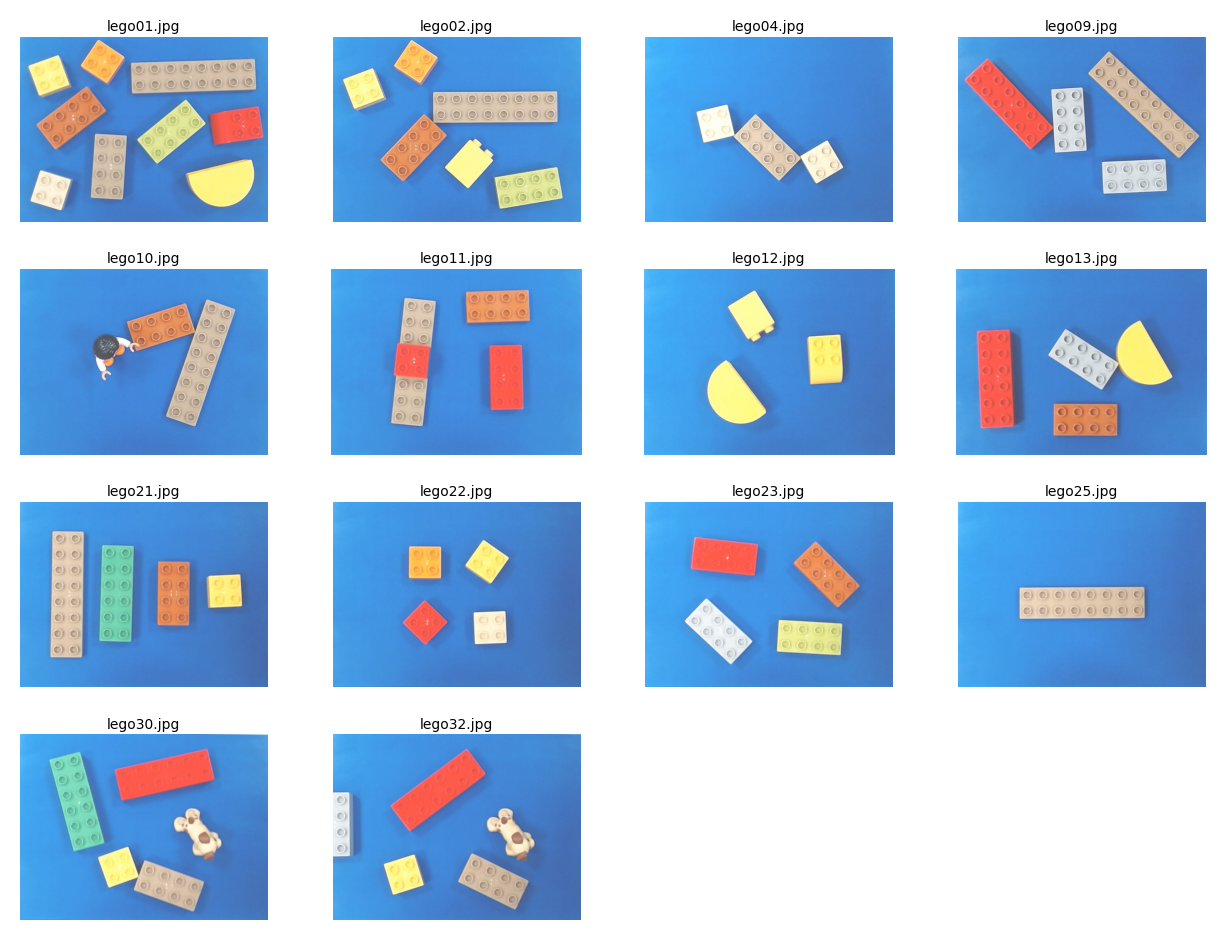

In [15]:
images = [load_image(PATH_TO_IMAGES, file) for file in image_file_names]

ncols = 4
nrows = (len(images) + ncols - 1) // ncols

# Plot each image in a grid
for i, image in enumerate(images):
    plt.subplot(nrows, ncols, i + 1)
    plt.imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB))
    plt.title(f'{image_file_names[i]}', fontsize=5, pad=2)
    plt.axis('off')

plt.tight_layout()  
plt.show()

Agora que temos uma ajuda visual para compreender como as imagens se apresentam, avançamos para a análise das cores das imagens para determinar qual será a melhor abordagem na binarização das mesmas:

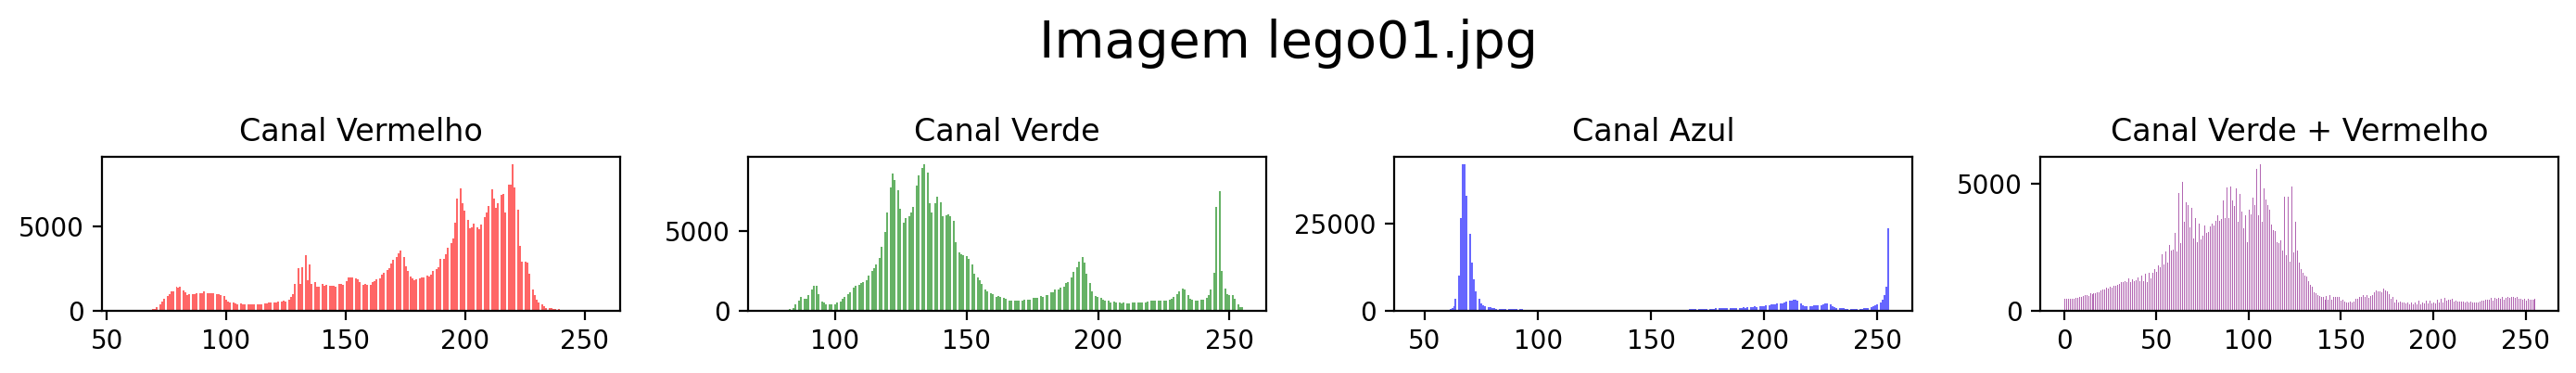

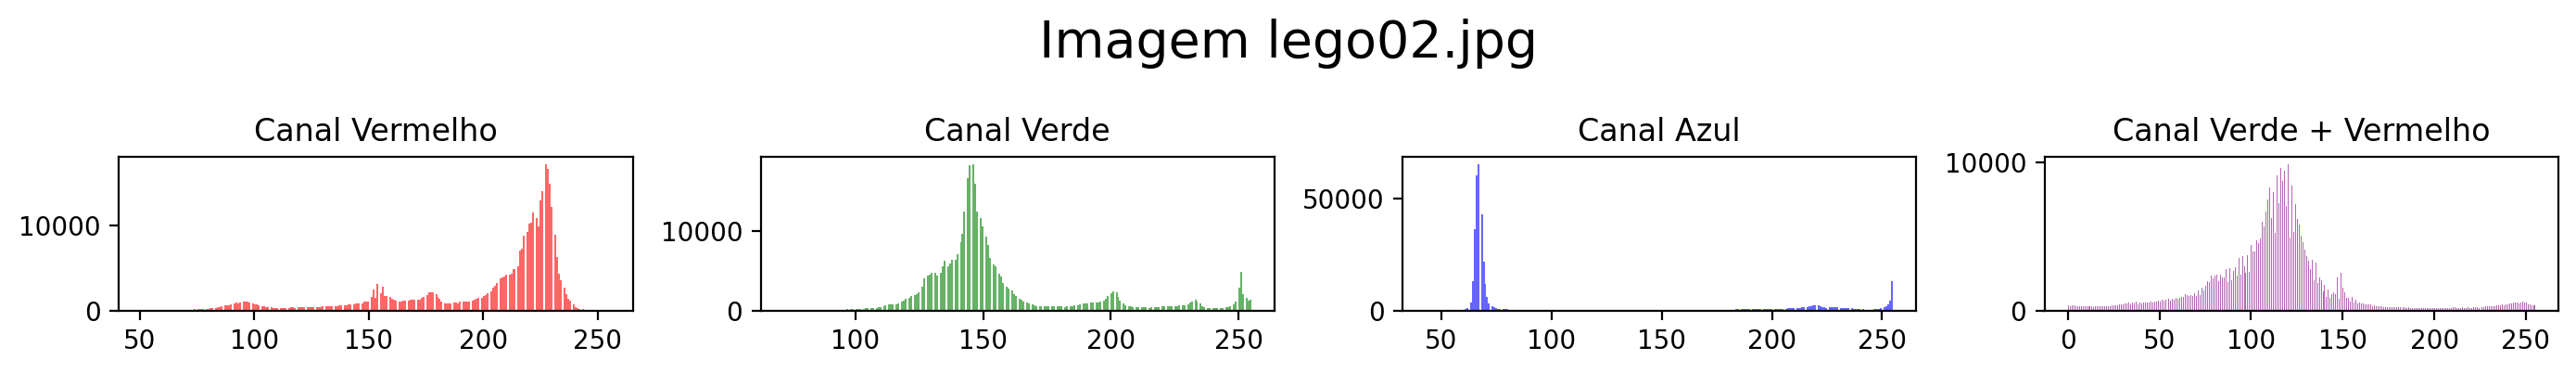

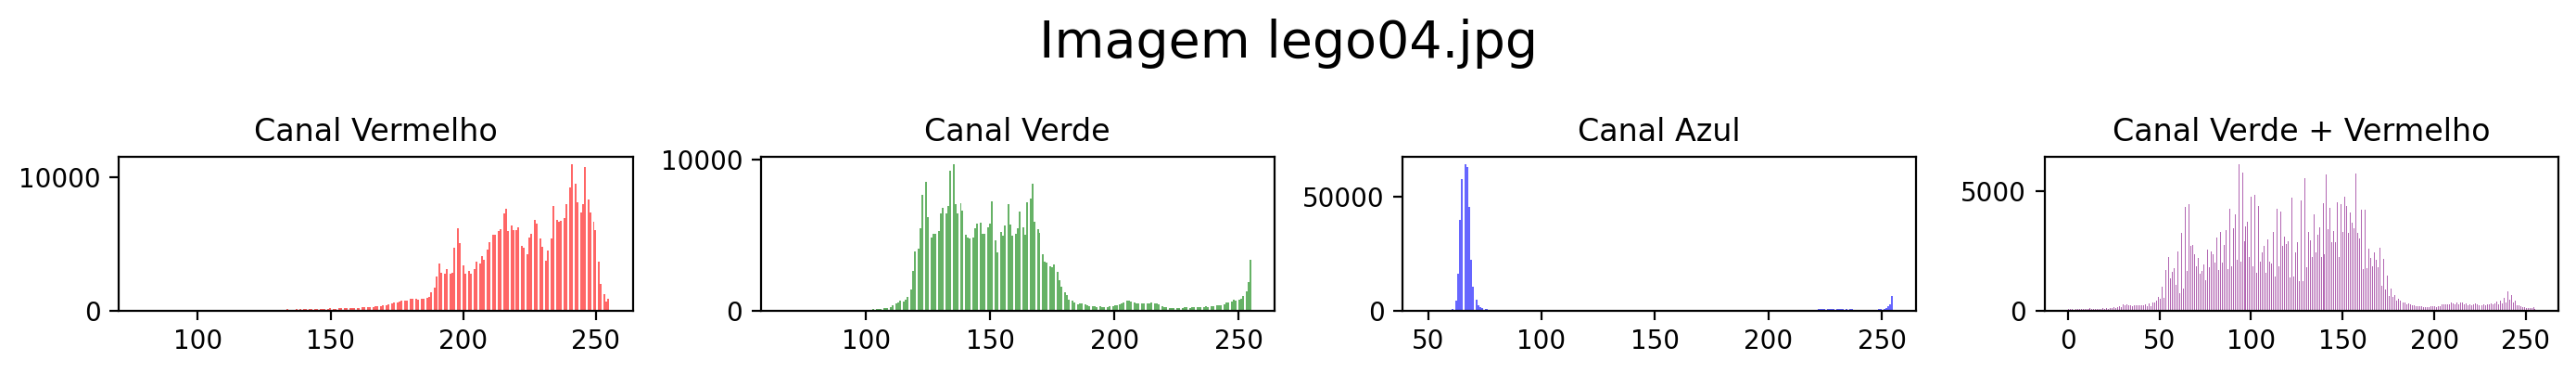

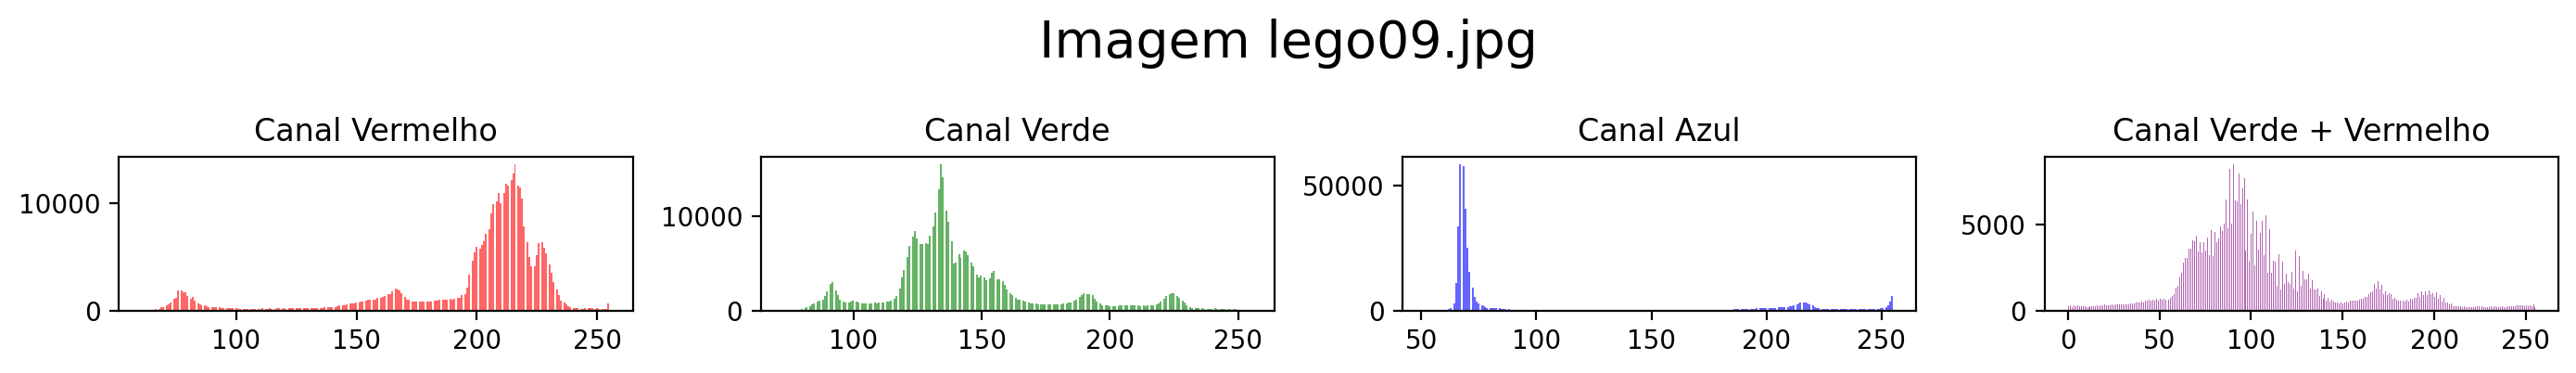

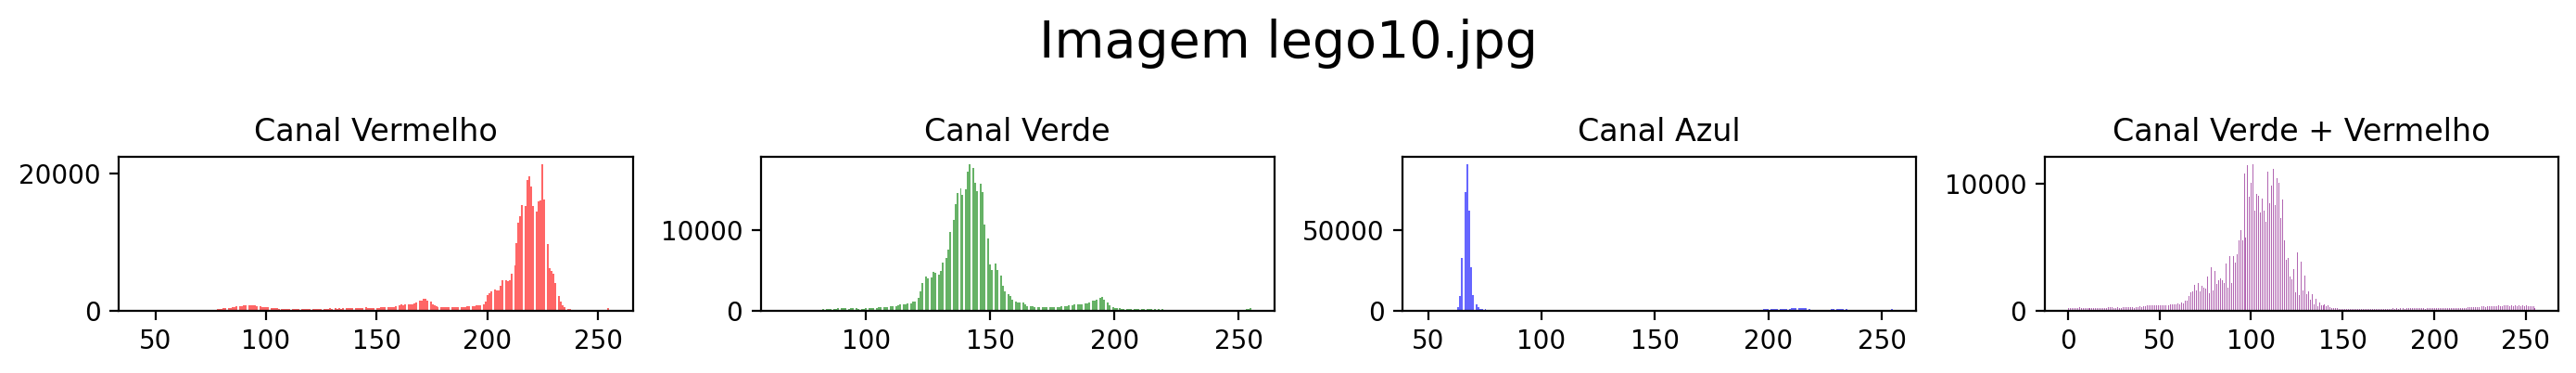

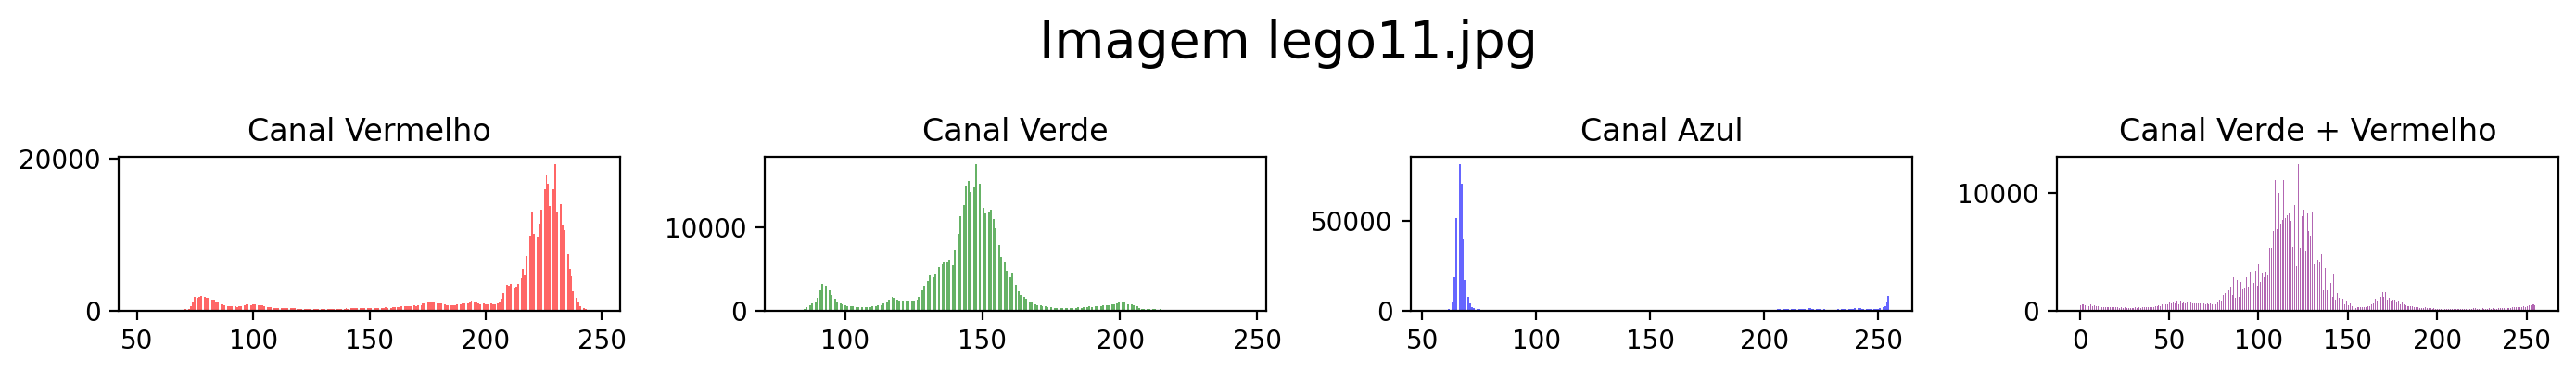

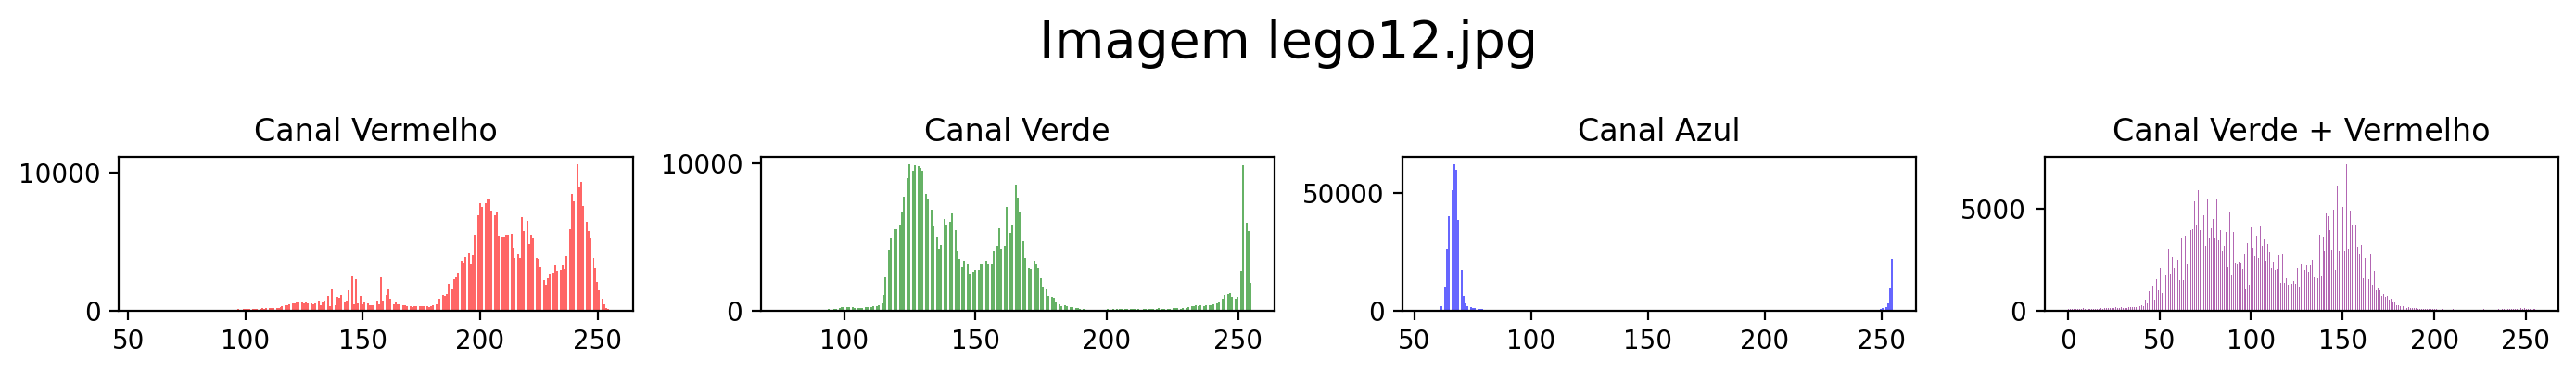

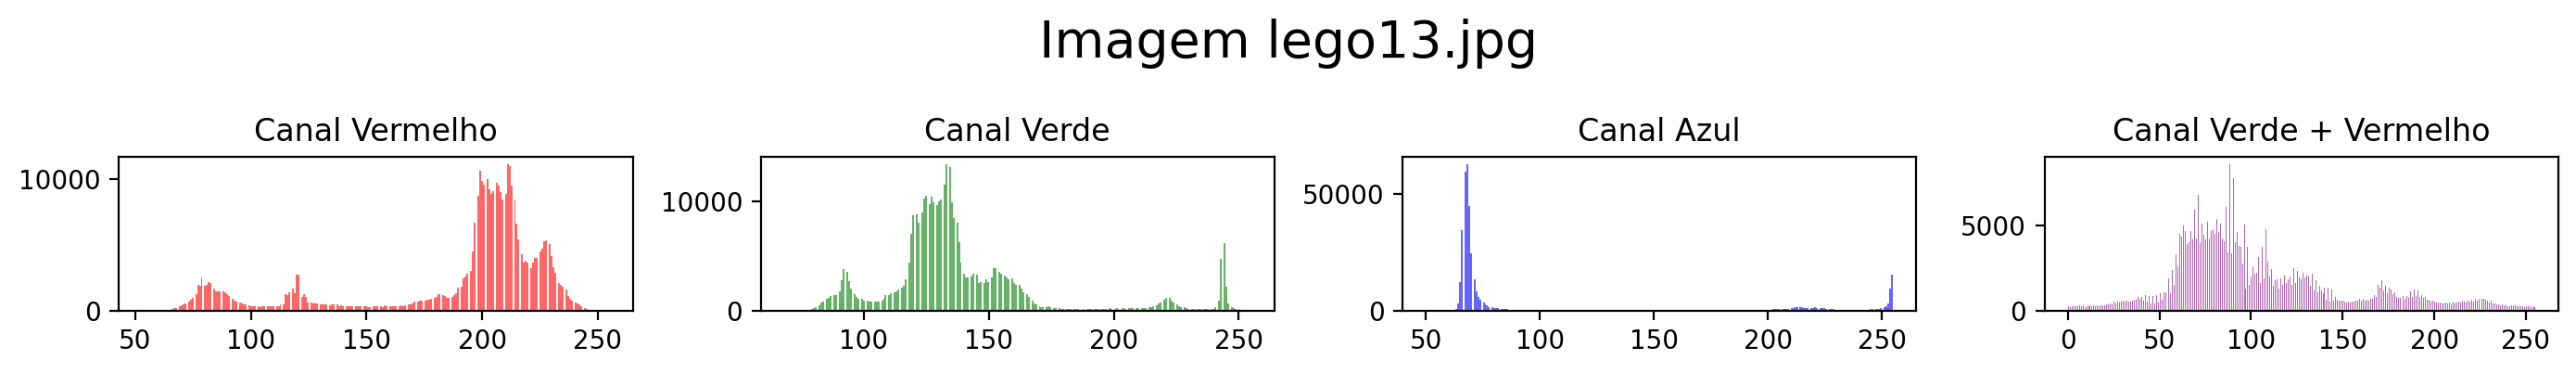

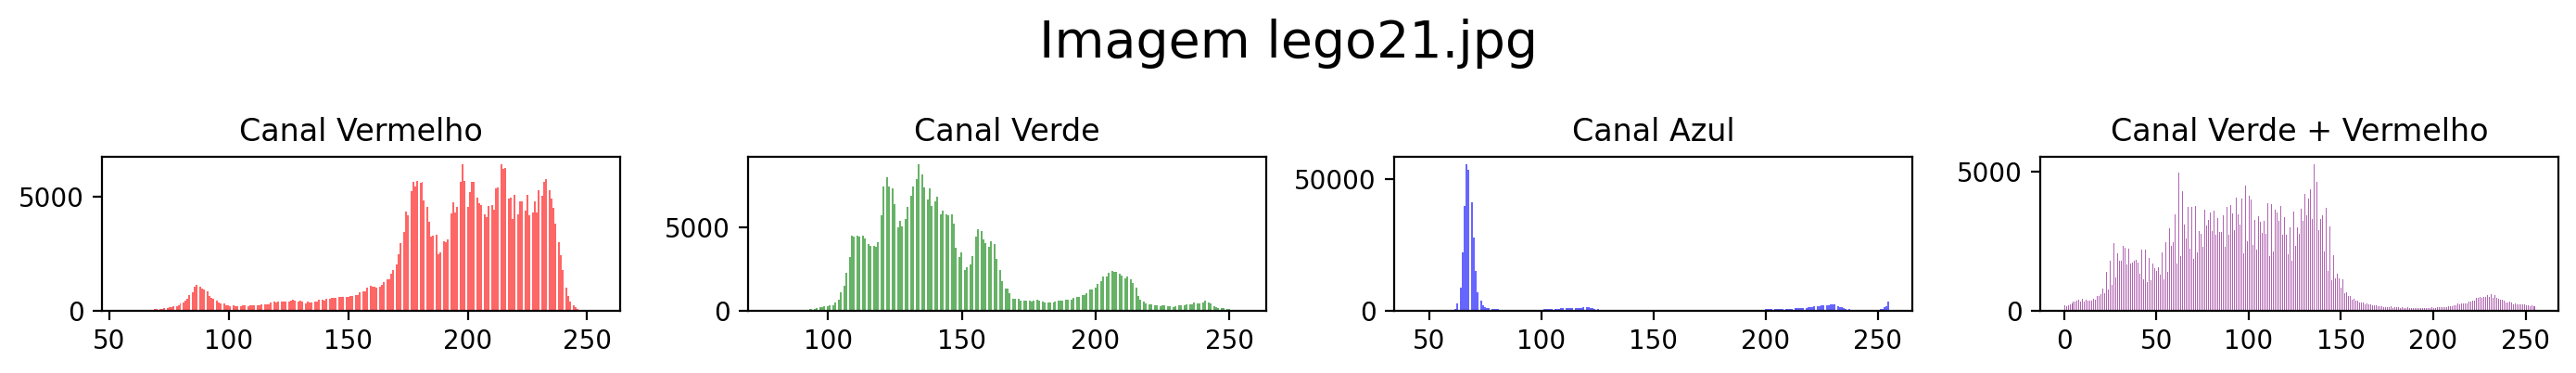

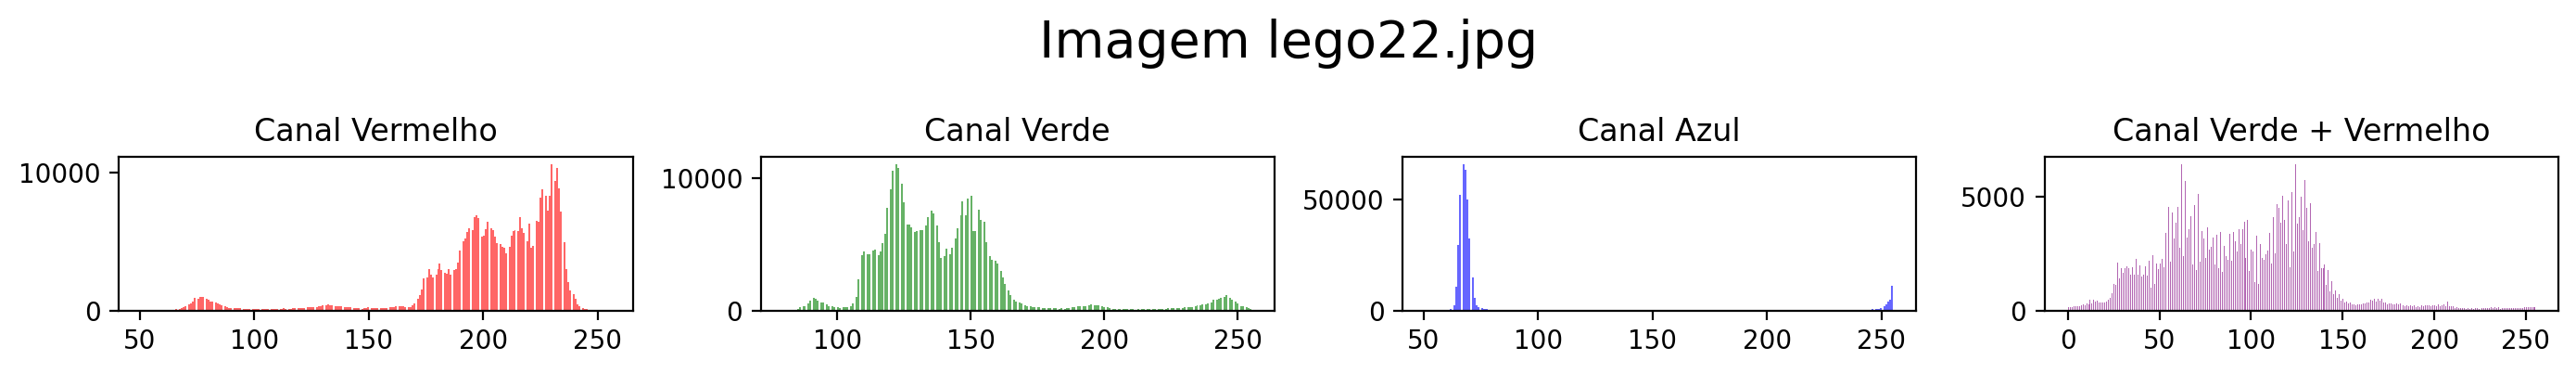

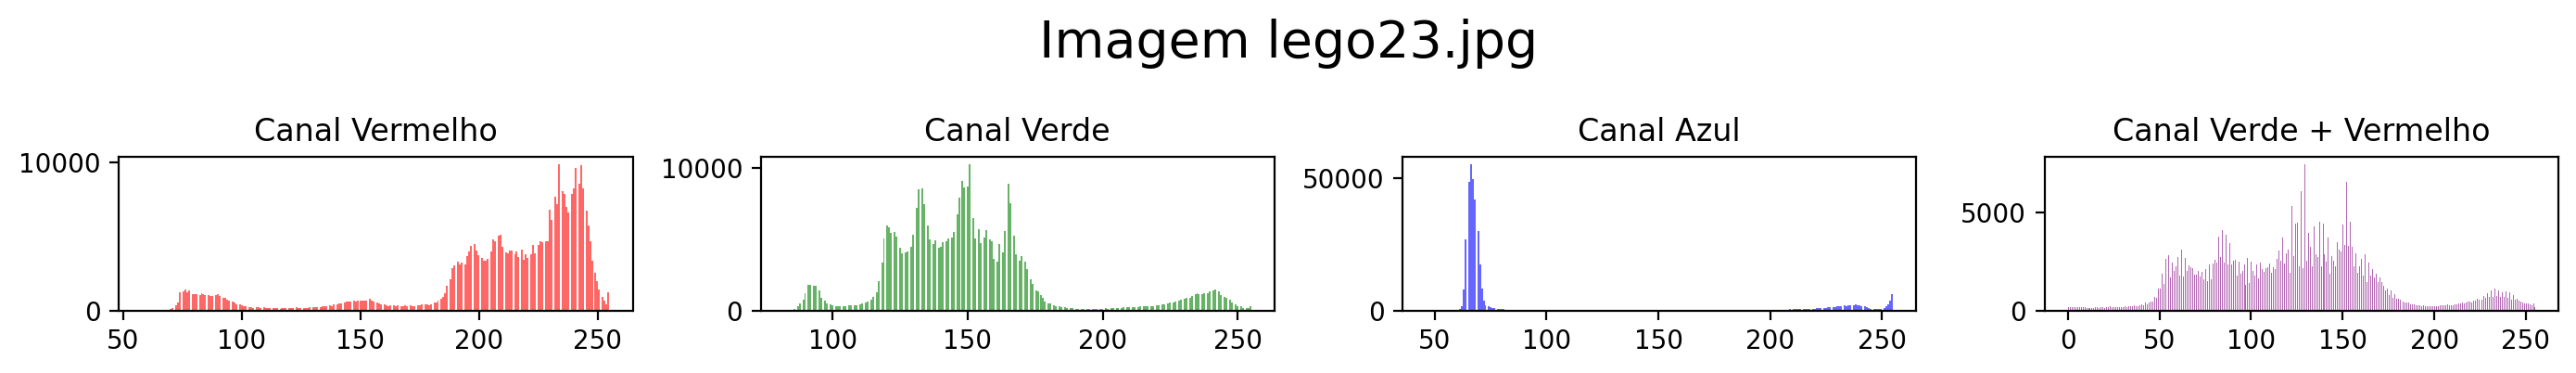

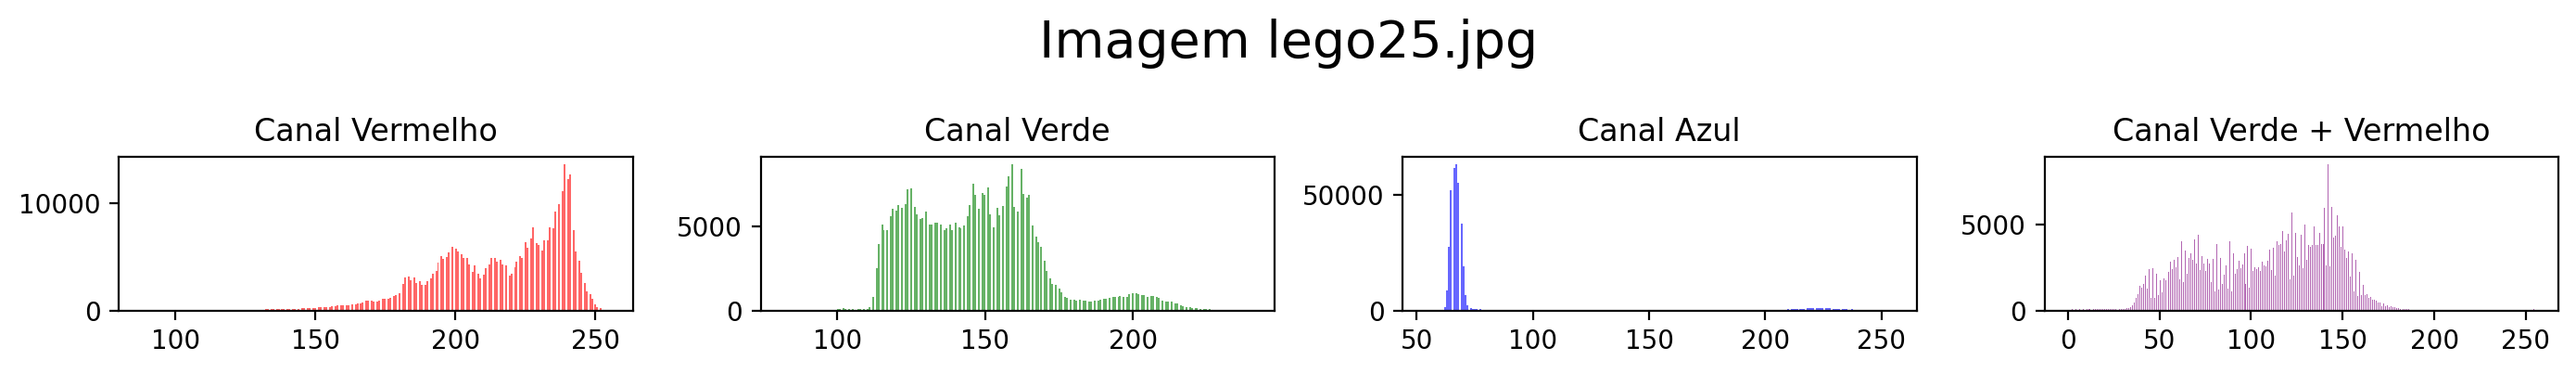

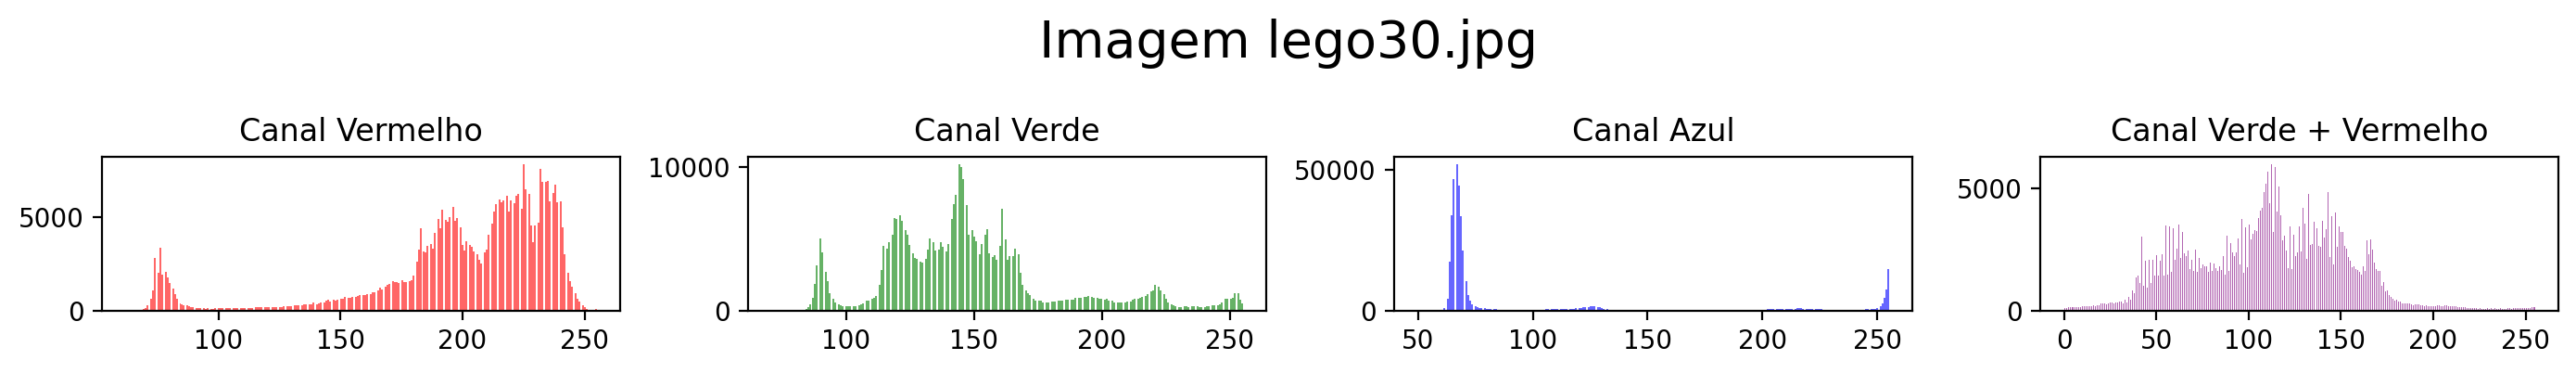

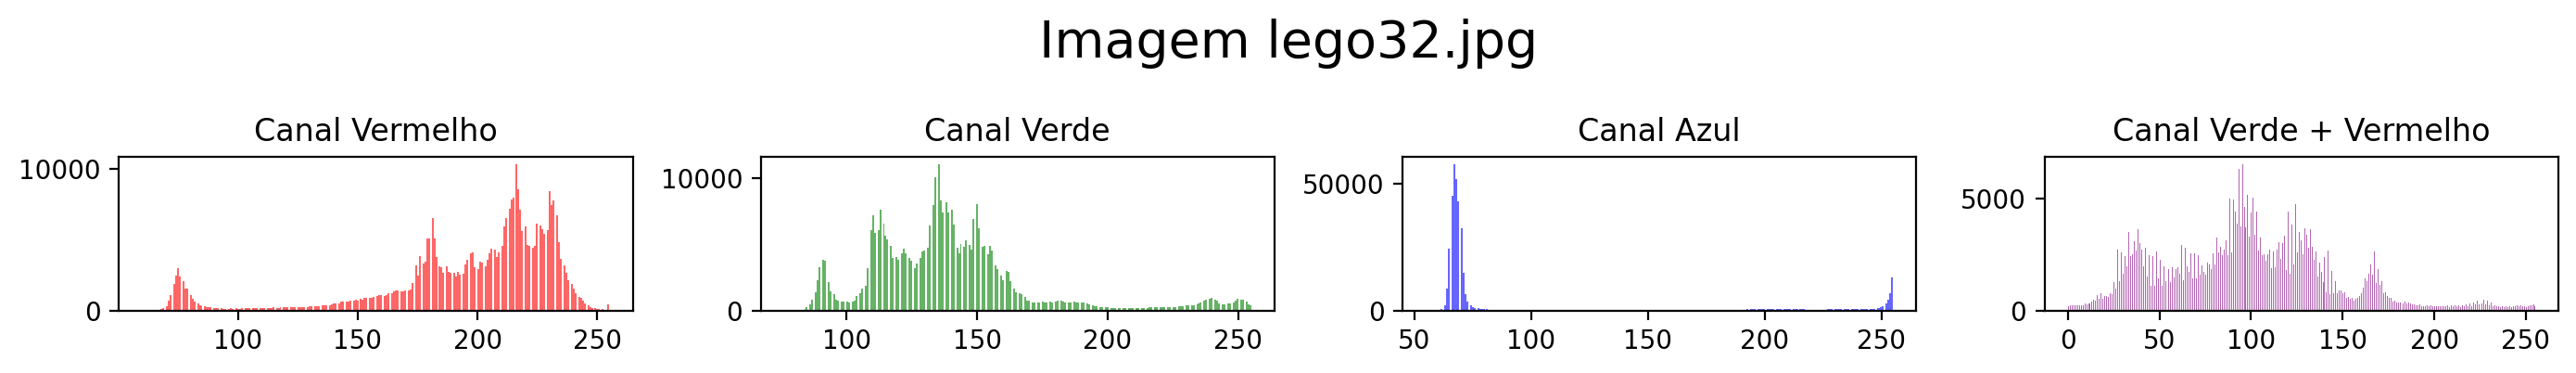

In [16]:
for i, image in enumerate(images):
    image_histogram(image, image_file_names[i])

Os histogramas das imagens mostram como os pixels estão distribuídos em cada canal de cor: vermelho, verde e azul. Além disso, a combinação dos canais vermelho e verde fornece uma visão adicional. Esta representação gráfica ajuda-nos a entender a distribuição das cores na imagem, permitindo identificar melhor os elementos que compõem o fundo e os objetos de interesse, como as peças coloridas de Lego. Essa análise será bastante útil para as etapas seguintes de binarização da imagem.

#### Canal Azul
É comum observar uma concentração de valores baixos no canal azul, o que indica que esta cor tende a predominar nas áreas de fundo. Muitas imagens apresentam esse padrão, onde o fundo é geralmente mais escuro, resultando em intensidades reduzidas nesse canal. Assim, uma baixa intensidade de azul pode ser um bom indicador para distinguir as áreas do fundo das que contêm os objetos de interesse, que normalmente exibem outras cores.

#### Canais Vermelho e Verde
Por outro lado, os canais vermelho e verde costumam mostrar uma distribuição mais ampla e dispersa, especialmente nas intensidades médias e altas. Este padrão sugere que os objetos coloridos têm uma variedade de tons, o que se reflete na diversidade de valores observados nos histogramas. A combinação destes dois canais resulta num espectro que realça a riqueza de cores dos objetos, enquanto minimiza a influência do fundo.

#### Canal Verde + Vermelho
Combinar os canais vermelho e verde é uma estratégia eficaz para destacar os objetos coloridos na imagem, uma vez que exclui, em grande medida, as áreas azuis do fundo. Esta abordagem evita que o fundo escuro se sobreponha, permitindo que nos concentremos nos elementos de interesse. Observamos também que algumas peças com tons de azuis menos escuros podem ser parcialmente capturadas por esta combinação. Isto pode ajudar a identificar essas peças sem confundi-las com o fundo.

Com isto, a utilização da combinação dos canais vermelho e verde apresenta-se como uma abordagem promissora para a segmentação e binarização de imagens. Este método permite uma separação eficaz entre as peças coloridas e o fundo, realçando as peças de interesse e minimizando a interferência do fundo. 

### 7.2. Binarização

Aqui começamos por criar uma lista vazia - binarized_images - para armazenar as versões convertidas em preto e branco de uma série de imagens. Em seguida, processa cada imagem da coleção aplicando um método binarize_image - explicado anteriormente. As imagens binarizadas são adicionadas à lista binarized_images.

Após a conversão de todas as imagens, exibimo-las. 

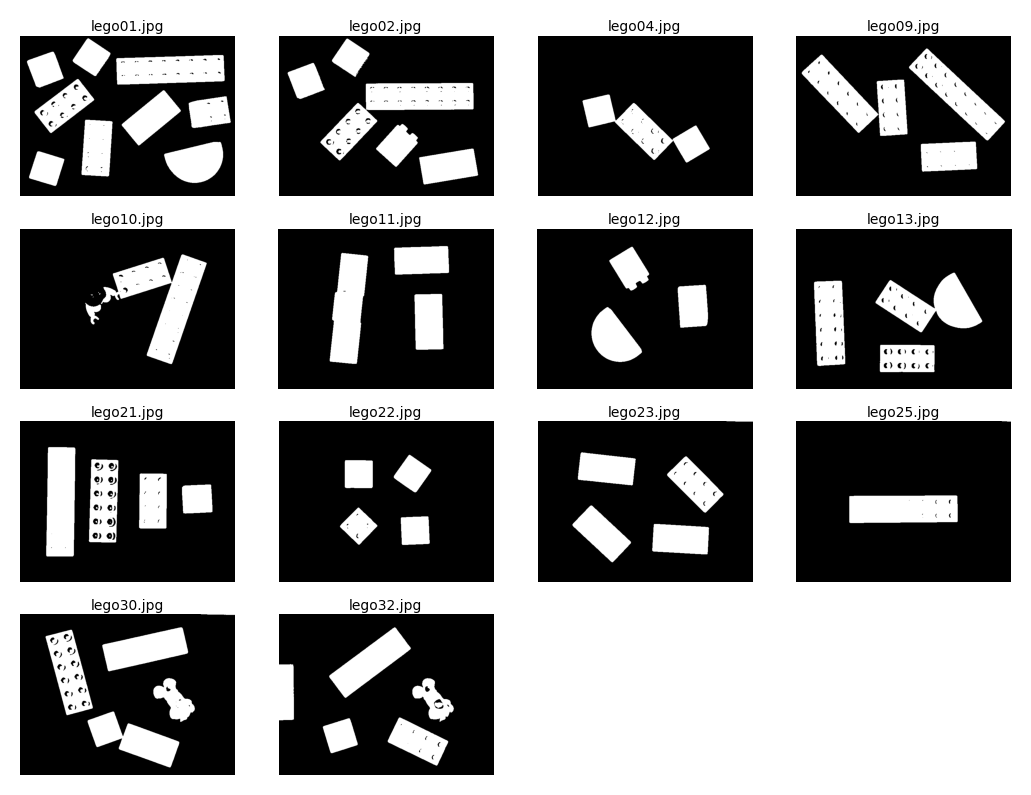

In [17]:
binarized_images = []
for i, image in enumerate(images):
    str_elemr, bw = binarize_image(image)
    binarized_images.append(bw)

for i, bw in enumerate(binarized_images):
    plt.subplot(nrows, ncols, i + 1)
    plt.imshow(bw, cmap='gray')
    plt.title(f'{image_file_names[i]}', fontsize=5, pad=2)
    plt.axis('off')

As imagens de saída mostram uma separação bem-sucedida das peças de LEGO sobre um fundo preto, com cada peça aparecendo como uma forma sólida branca. Nas imagens com várias peças de LEGO cada peça parece distinta e bem definida, indicando que estão claramente separadas umas das outras e do fundo. Quando estão posicionadas próximas parecem que estão isoladas o mais possível, apesar de algumas falhas que acontecem e que iremos tentar resolver futuramente - quer peças que possam ser erradamente consideradas umas ou as demasiadas falhas no centro das peças.  

No geral, este output mostra que o processo de binarização produziu representações limpas e isoladas de cada peça de LEGO, adequadas para análise ou validação posterior. 

### 7.3. Melhoramento da Imagem

Aqui é feito algo semlhante ao que acontece acima, começamos por criar uma lista - enhanced_images - para armazenar as versões melhoradas das imagens binarizadas. Em seguida, percorre cada imagem da lista binarized_images, aplicando a função enhance_image e adicionamo-las a lista.

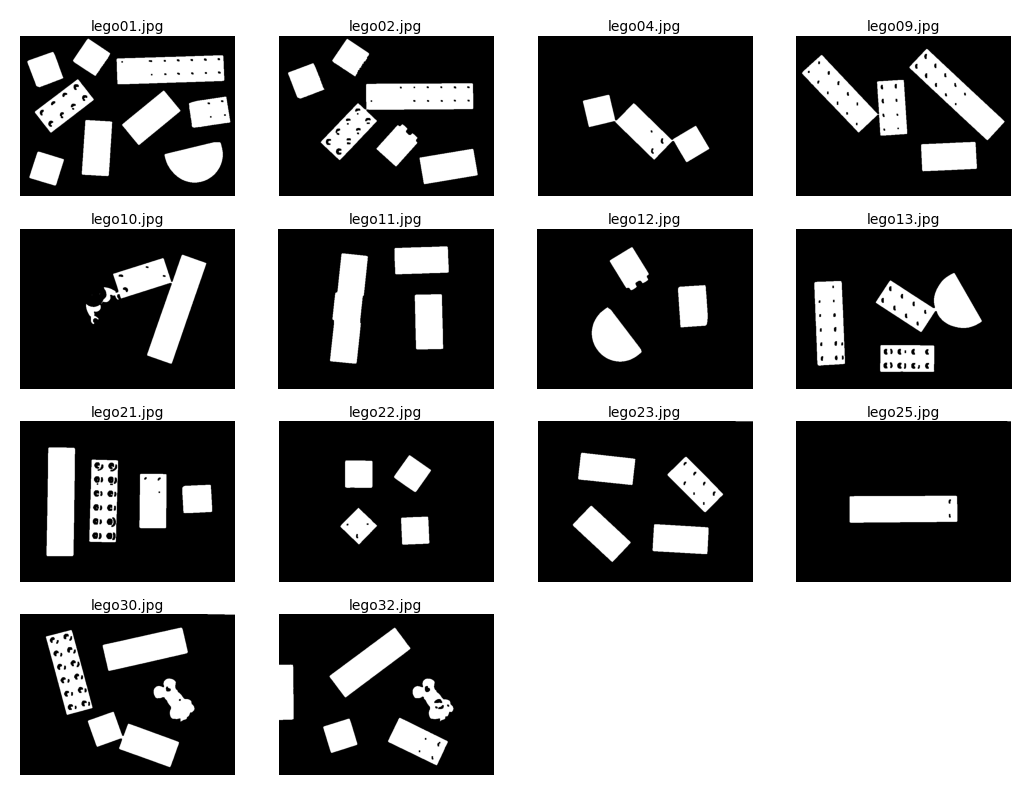

In [18]:
enhanced_images = []
for i, bw in enumerate(binarized_images):
    enhanced_image = enhance_image(bw, str_elemr)
    enhanced_images.append(enhanced_image)

for i, enhanced_image in enumerate(enhanced_images):
    plt.subplot(nrows, ncols, i + 1)
    plt.imshow(enhanced_image, cmap='gray')
    plt.title(f'{image_file_names[i]}', fontsize=5, pad=2)
    plt.axis('off')

Neste resultado atualizado, observamos uma melhoria significativa na clareza e na estrutura das peças de LEGO em comparação com a imagem anterior. O aprimoramento morfológico, especificamente os passos de fechamento e erosão, limpou as imagens binárias ao preencher pequenas lacunas e refinar as bordas, o que melhora a separação das peças e a nitidez dos contornos. Apesar de não estar perfeito - de forma que, ainda conseguimos observar algumas falhas nas peças e outras que ainda estão 'juntas' -, foi a melhor forma de melhorar a imagem binária sem que as peças que se toquem unissem-se por completo. 

### 7.4. Classificação e Extracção de Componentes Conexos e das Propriedades.

Agora, focamo-nos na validação de intervalos teóricos de área para diferentes tipos de peças, garantindo que cada peça detectada esteja dentro de intervalos de tamanho aceitáveis. Ao estabelecer estes intervalos de área com base em proporções de tamanho predefinidas, torna-se mais fácil classificar as peças e detectar quaisquer anomalias, como peças que ficaram ainda juntas. O objetivo desta validação é aumentar a confiabilidade do algoritmo aplicando essas verificações de tamanho, o que auxiliará na melhor separação e identificação de peças individuais nas etapas subsequentes.

Estes intervalos definem áreas mínimas e máximas para cada tipo de peça, assegurando que as peças detectadas possam ser validadas com base em expectativas teóricas. A função get_min_max_ratios é utilizada para calcular um intervalo geral mínimo e máximo, abrangendo todos os tipos de peças, o que nos ajudou a definir um limite global de validade de área para todo o conjunto de dados.

Para além desta validação também calculamos em cada peça o seu verdadeirp ratio (w/h) e comparamos com o valor teórico do mesmo (tendo em conta uma tolêrancia) para extra válidação e mais segurança. Esta outra comparação vai ser trabalhada mais a frente.



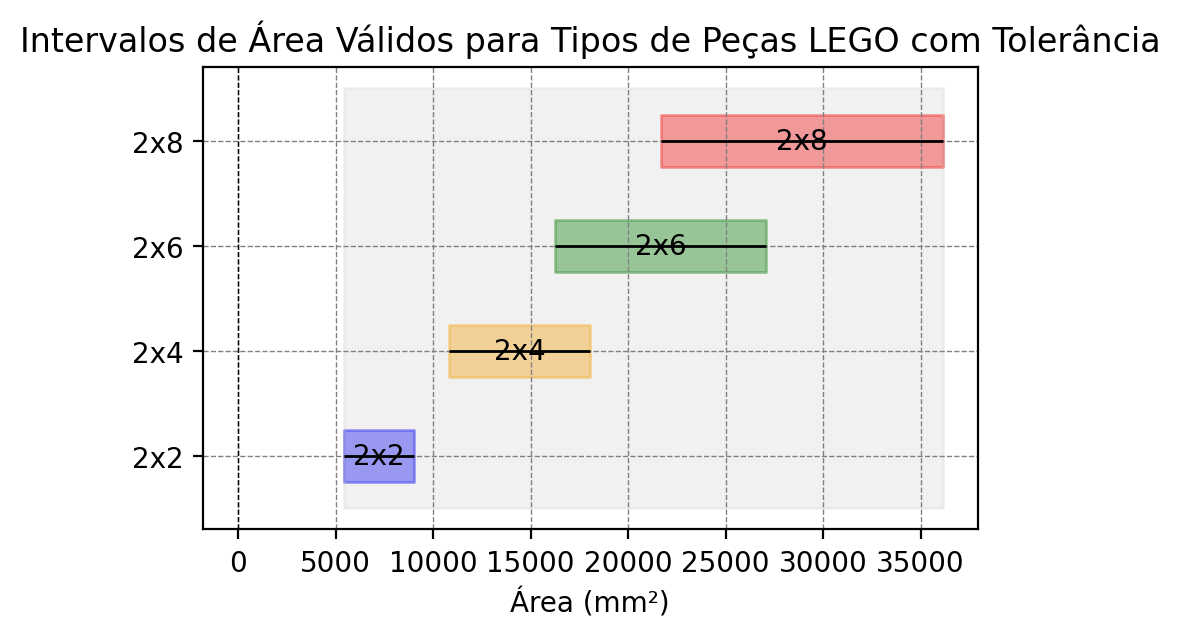

In [19]:
intervals = calculate_areas(MIN_LEGO_LENGTH_SIZE, PIECE_RATIOS, TOLERANCE)

min_ratio, max_ratio = get_min_max_ratios()
overall_min_area = calculate_areas(MIN_LEGO_LENGTH_SIZE, { "min": min_ratio }, TOLERANCE)["min"][0]
overall_max_area = calculate_areas(MIN_LEGO_LENGTH_SIZE, { "max": max_ratio }, TOLERANCE)["max"][1]

plt.figure(figsize=(5, 3))
cores = ['blue', 'orange', 'green', 'red'] 

for i, (tipo_peça, (min_area, max_area)) in enumerate(intervals.items()):
    plt.fill_betweenx([i-TOLERANCE, i+TOLERANCE], min_area, max_area, color=cores[i], alpha=0.5, label=f'Área {tipo_peça}')
    plt.hlines(y=i, xmin=min_area, xmax=max_area, color='black', linewidth=1)
    plt.text((min_area + max_area) / 2, i, f'{tipo_peça}', horizontalalignment='center', verticalalignment='center')

plt.fill_betweenx([-0.5, len(intervals)-0.5], overall_min_area, overall_max_area, color='lightgray', alpha=0.3, label='Área')

plt.yticks(range(len(intervals)), intervals.keys())
plt.xlabel('Área (mm²)')
plt.title('Intervalos de Área Válidos para Tipos de Peças LEGO com Tolerância')
plt.axvline(x=0, color='black', linewidth=0.5, ls='--')
plt.grid(color='gray', linestyle='--', linewidth=0.5)
#plt.legend()
plt.show()


Esta secção exibe cada peça numa cor diferente e mostra o número de peças que o algoritmo detetou até agora em cada imagem. Utilizando pseudo-colorização, cada região distinta é destacada, facilitando a separação visual de peças individuais. O título de cada imagem indica o número total de regiões detetadas, permitindo-nos ver quantas peças o algoritmo identifica atualmente por imagem.

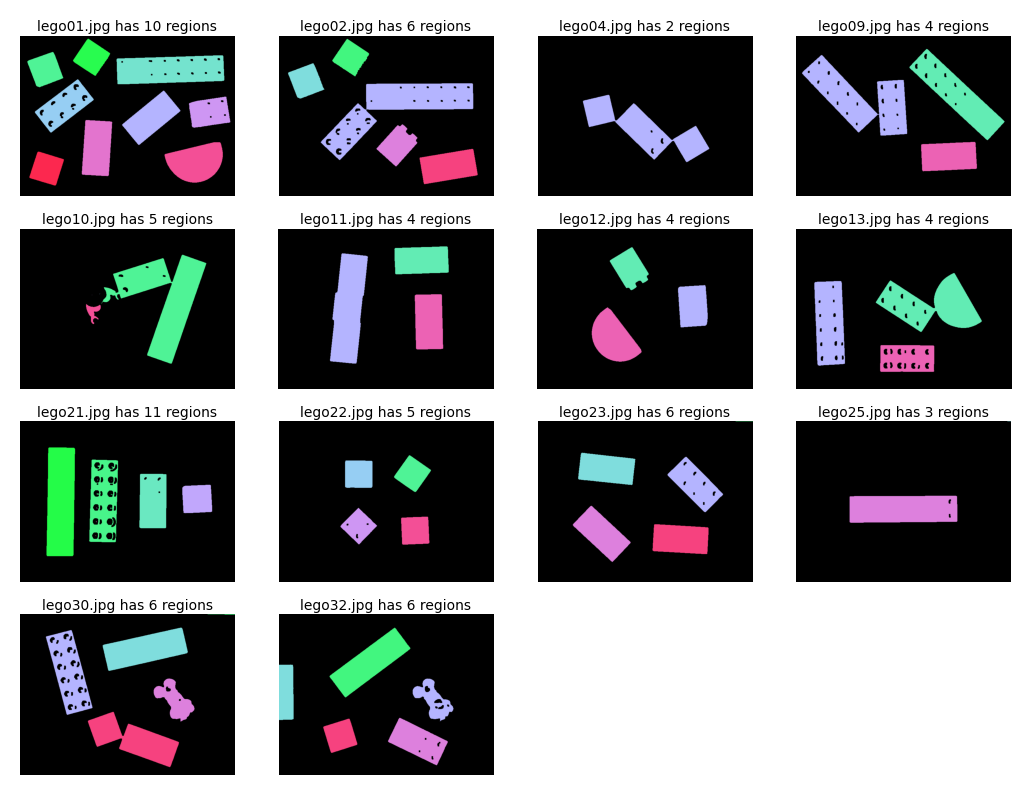

In [20]:
psedo_colored_images = []
region_num_list = []

for i, enhanced_image in enumerate(enhanced_images):
    region_num, pseudo_colored_img = label_regions(enhanced_image, 120)
    psedo_colored_images.append(pseudo_colored_img)
    region_num_list.append(region_num)

for i, pseudo_colored_img in enumerate(psedo_colored_images):
    plt.subplot(nrows, ncols, i + 1)
    plt.imshow(pseudo_colored_img)
    plt.title(f'{image_file_names[i]} has {region_num_list[i]} regions', fontsize=5, pad=2)
    plt.axis('off')

O resultado desta secção mostra que as imagens com peças claramente separadas foram identificadas com sucesso, com cada peça exibida numa cor distinta. No entanto, nos casos em que as peças estão em contacto ou ligeiramente sobrepostas, o algoritmo tende ainda a detetá-las como uma única região, apesar da erosão e de outras operações morfológicas aplicadas.

Este problema poderia ser melhorado ajustando os parâmetros das operações morfológicas (e.g., erosão e dilatação) para separar melhor as peças em contacto. No entanto, o ajuste destes valores acarreta alguns riscos: aumentar a erosão pode, de forma indesejada, conectar ainda mais as peças, enquanto uma dilatação excessiva pode criar grandes lacunas ou buracos dentro de peças individuais, reduzindo a precisão da segmentação. Dado este equilíbrio, optámos por manter as definições atuais para evitar comprometer a integridade das peças individuais, ao mesmo tempo que se consegue uma separação eficaz das regiões na maioria dos casos.

***

Para cada imagem aprimorada, utilizámos o código para detetar e classificar as peças de forma precisa, aplicando três iterações para refinar a separação de peças:

In [21]:
for i, enhanced_image in enumerate(enhanced_images):
    pieces_info = detect_and_classify(images[i], enhanced_image, iterations=3)

Em seguida, gerámos imagens pseudo-coloridas para destacar cada região separadamente. Em cada imagem aprimorada, identificámos o número de regiões distintas e aplicámos cores diferentes a cada uma e exibimos as mesmas:

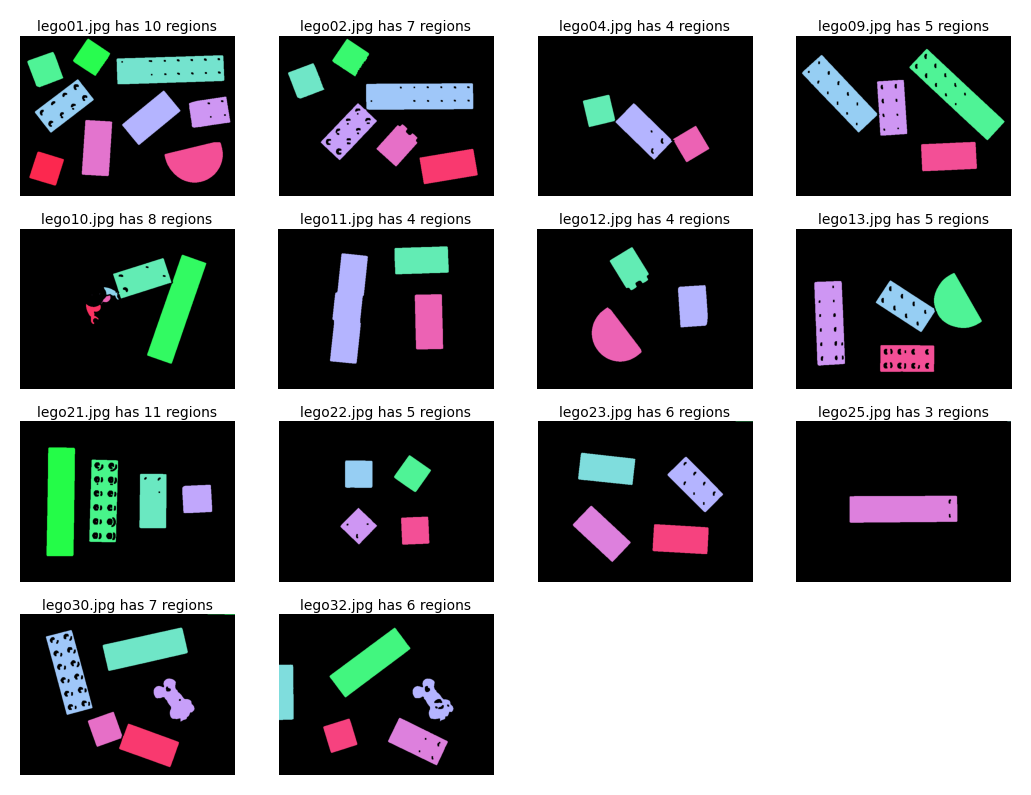

In [22]:
# region_num, pseudo_colored_img = label_regions(bw, 120)
# print(f'Number of regions: {region_num}')
# cv.imshow('Pseudo-colored Image', pseudo_colored_img) if self.verbose else None
psedo_colored_images = []
region_num_list = []

for i, enhanced_image in enumerate(enhanced_images):
    region_num, pseudo_colored_img = label_regions(enhanced_image, 120)
    psedo_colored_images.append(pseudo_colored_img)
    region_num_list.append(region_num)

for i, pseudo_colored_img in enumerate(psedo_colored_images):
    plt.subplot(nrows, ncols, i + 1)
    plt.imshow(pseudo_colored_img)
    plt.title(f'{image_file_names[i]} has {region_num_list[i]} regions', fontsize=5, pad=2)
    plt.axis('off')

Aplicando este processo a cada imagem e utilizando novamente a pseudo-colorização, verificámos que a nossa abordagem foi bem-sucedida. Cada peça que antes era identificada como pertencendo à mesma região foi agora corretamente separada, confirmando a eficácia do método ajustado.

***

Agora, finalmente, conseguimos detectar e classificar peças de LEGO em cada imagem melhorada, seguido da anotação das imagens com informações sobre as peças identificadas. A função detect_and_classify é chamada para cada imagem melhorada, retornando uma lista de peças detectadas e suas propriedades associadas.

Um dicionário -  PIECE_COUNTER - é inicializado para acompanhar a contagem de vários tipos de tijolos (2x2, 2x4, 2x6 e 2x8) identificados em cada imagem. Para cada peça detectada, contornos são desenhados na imagem original para indicar visualmente sua localização, e o tipo da peça é rotulado no seu centro utilizando as funções de texto do OpenCV. Agregamos as contagens de cada tipo de peça, atualizando o PIECE_COUNTER de acordo, enquanto ignora quaisquer peças classificadas como "Desconhecidas".

[{'image': 'lego01.jpg', '2x2': 3, '2x4': 3, '2x6': 0, '2x8': 1, 'unidentified': 2, 'total': 9}, {'image': 'lego02.jpg', '2x2': 2, '2x4': 2, '2x6': 0, '2x8': 1, 'unidentified': 1, 'total': 6}, {'image': 'lego04.jpg', '2x2': 2, '2x4': 1, '2x6': 0, '2x8': 0, 'unidentified': 0, 'total': 3}, {'image': 'lego09.jpg', '2x2': 0, '2x4': 2, '2x6': 1, '2x8': 1, 'unidentified': 0, 'total': 4}, {'image': 'lego10.jpg', '2x2': 0, '2x4': 1, '2x6': 0, '2x8': 1, 'unidentified': 0, 'total': 2}, {'image': 'lego11.jpg', '2x2': 0, '2x4': 2, '2x6': 0, '2x8': 1, 'unidentified': 0, 'total': 3}, {'image': 'lego12.jpg', '2x2': 0, '2x4': 0, '2x6': 0, '2x8': 0, 'unidentified': 3, 'total': 3}, {'image': 'lego13.jpg', '2x2': 0, '2x4': 2, '2x6': 1, '2x8': 0, 'unidentified': 1, 'total': 4}, {'image': 'lego21.jpg', '2x2': 1, '2x4': 1, '2x6': 1, '2x8': 1, 'unidentified': 0, 'total': 4}, {'image': 'lego22.jpg', '2x2': 4, '2x4': 0, '2x6': 0, '2x8': 0, 'unidentified': 0, 'total': 4}, {'image': 'lego23.jpg', '2x2': 0, '2x4'

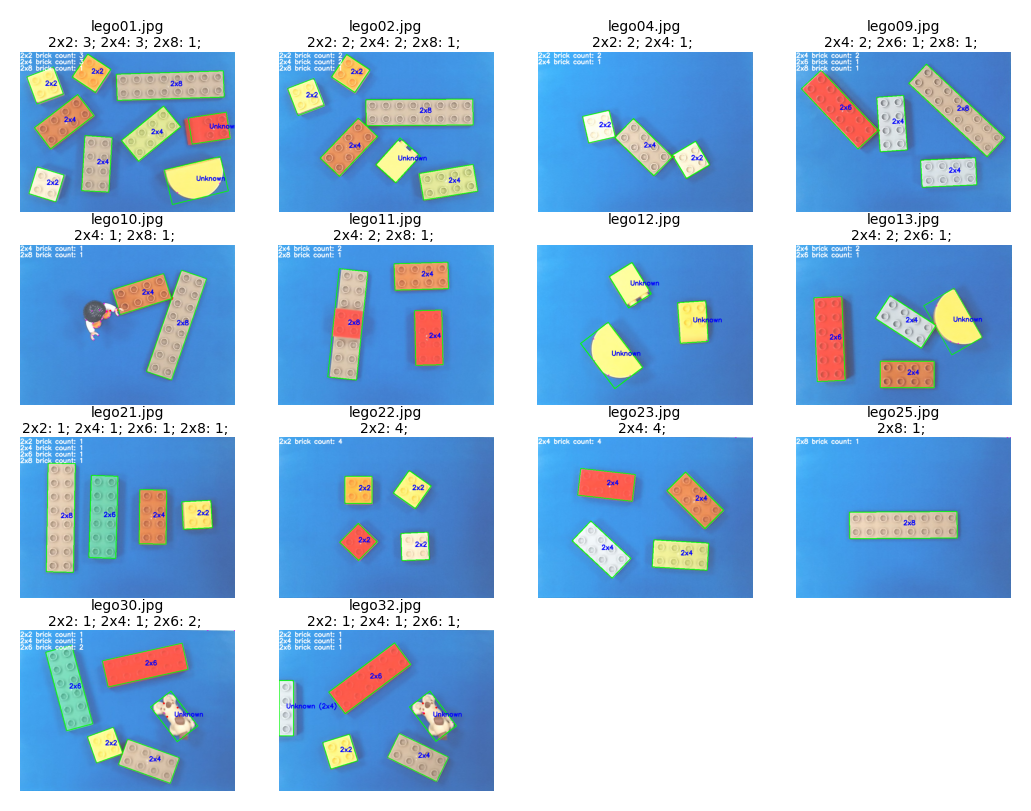

In [23]:
output_data = []
for i, enhanced_image in enumerate(enhanced_images):
    pieces_info, aspect_ratios = detect_and_classify(images[i], enhanced_image, iterations=3)

    PIECE_COUNTER = {
        "2x2 brick count": 0,
        "2x4 brick count": 0,
        "2x6 brick count": 0,
        "2x8 brick count": 0
    }

    unidentified_count = 0  # Initialize unidentified piece counter

    for piece in pieces_info:
        cv.drawContours(images[i], [piece['contour']], 0, (0, 255, 0), 2)
        cv.putText(images[i], piece['piece_type'], piece['center'], 
                   cv.FONT_HERSHEY_SIMPLEX, 0.7, (255, 0, 0), 2)

        if piece['piece_type'].split(' ')[0] == "Unknown":
            unidentified_count += 1  # Increment unidentified piece counter
            continue
            
        PIECE_COUNTER[f"{piece['piece_type']} brick count"] += 1

    total_count = sum(PIECE_COUNTER.values())

    output_dict = {
        "image": image_file_names[i],
        **{key.replace(" brick count", ""): value for key, value in PIECE_COUNTER.items()},
        "unidentified": unidentified_count,  # Add unidentified pieces to the output
        "total": total_count + unidentified_count  # Include unidentified in total count
    }

    output_data.append(output_dict)

    quick_desc = ""
    items = list(PIECE_COUNTER.items())
    count_mod = 1
    scale = 0.7
    color = (255, 255, 255)
    
    for l in range(len(items)):
        label, count = items[l]
        if count > 0:
            cv.putText(images[i], label + ': ' + str(count), 
                       (0, int(30 * scale * (count_mod + l))), 
                       cv.FONT_HERSHEY_SIMPLEX, scale, color, 2)
            quick_desc += f"{label.replace(' brick count', '')}: {count}; "
        else:
            count_mod -= 1

    plt.subplot(nrows, ncols, i + 1)
    plt.imshow(images[i][:, :, ::-1])  # Convert BGR to RGB for matplotlib
    plt.title(f'{image_file_names[i]}\n{quick_desc}', 
              fontsize=5, pad=2)
    plt.axis('off')

print(output_data)


Success rate for lego01.jpg: 100.00%
Success rate for lego02.jpg: 100.00%
Success rate for lego04.jpg: 100.00%
Success rate for lego09.jpg: 100.00%
Success rate for lego10.jpg: 100.00%
Success rate for lego11.jpg: 75.00%
Success rate for lego12.jpg: 100.00%
Success rate for lego13.jpg: 100.00%
Success rate for lego21.jpg: 100.00%
Success rate for lego22.jpg: 100.00%
Success rate for lego23.jpg: 100.00%
Success rate for lego25.jpg: 100.00%
Success rate for lego30.jpg: 100.00%
Success rate for lego32.jpg: 75.00%


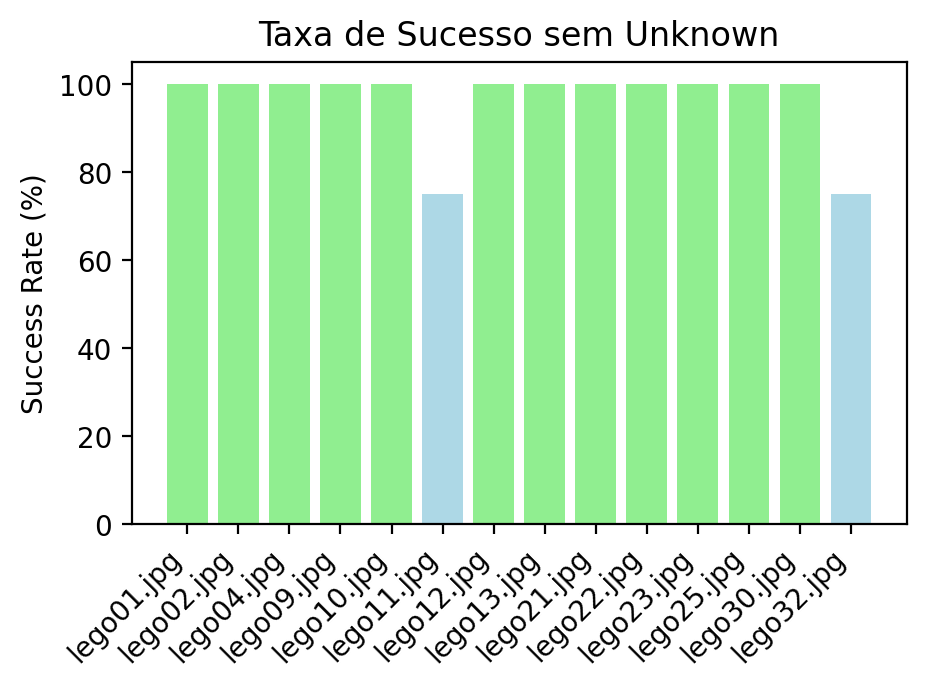

Success rate for lego01.jpg: 100.00%
Success rate for lego02.jpg: 100.00%
Success rate for lego04.jpg: 100.00%
Success rate for lego09.jpg: 100.00%
Success rate for lego10.jpg: 80.00%
Success rate for lego11.jpg: 80.00%
Success rate for lego12.jpg: 100.00%
Success rate for lego13.jpg: 100.00%
Success rate for lego21.jpg: 100.00%
Success rate for lego22.jpg: 100.00%
Success rate for lego23.jpg: 100.00%
Success rate for lego25.jpg: 100.00%
Success rate for lego30.jpg: 100.00%
Success rate for lego32.jpg: 60.00%


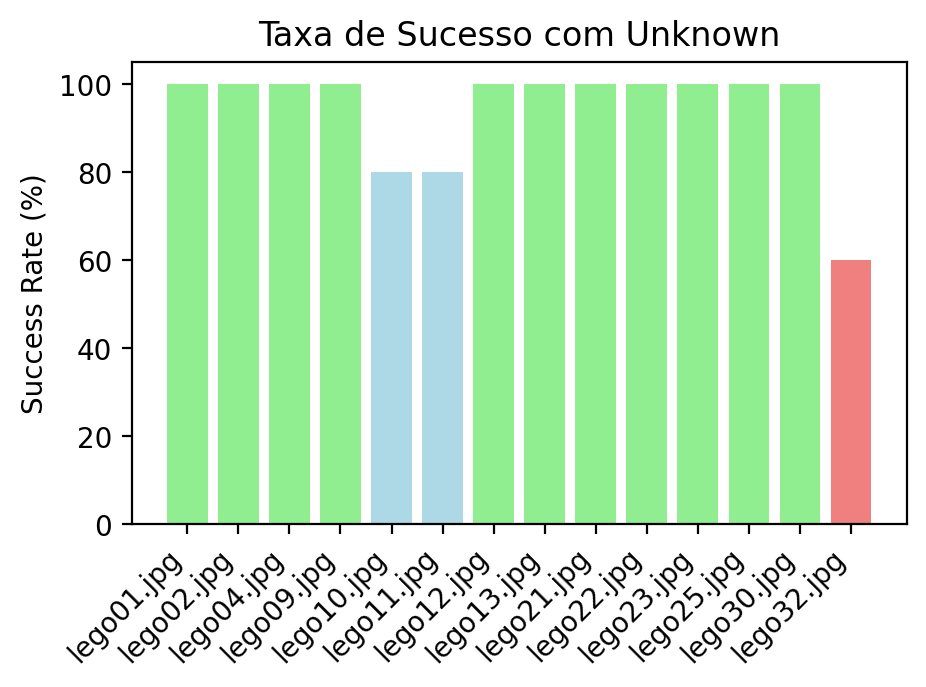

In [26]:
def calculate_success_rate_per_image(lego_data, output_data, total_types = 4, keys= ["2x2", "2x4", "2x6", "2x8"]):
    success_rates = {}
    
    for theoretical, output in zip(lego_data, output_data):
        matches = 0
        
        for key in keys:
            if theoretical[key] == output[key]:
                matches += 1
        
        success_rate = (matches / total_types) * 100
        success_rates[theoretical["image"]] = success_rate
        
    return success_rates

success_rates = calculate_success_rate_per_image(LEGO_DATA, output_data)

for image, rate in success_rates.items():
    print(f"Success rate for {image}: {rate:.2f}%")

plt.figure(figsize=(5, 3))
plt.bar(success_rates.keys(), success_rates.values(), 
        color=['lightgreen' if rate == 100 
        else 'lightcoral' if rate < 75 
        else 'lightblue' for rate in success_rates.values()])
plt.ylabel('Success Rate (%)')
plt.title('Taxa de Sucesso sem Unknown')
plt.xticks(rotation=45, ha='right')
plt.show()

success_rates = calculate_success_rate_per_image(LEGO_DATA, output_data, 5, ["2x2", "2x4", "2x6", "2x8", "unidentified"])

for image, rate in success_rates.items():
    print(f"Success rate for {image}: {rate:.2f}%")

plt.figure(figsize=(5, 3))
plt.bar(success_rates.keys(), success_rates.values(), 
        color=['lightgreen' if rate == 100 
        else 'lightcoral' if rate < 75 
        else 'lightblue' for rate in success_rates.values()])
plt.ylabel('Success Rate (%)')
plt.title('Taxa de Sucesso com Unknown')
plt.xticks(rotation=45, ha='right')
plt.show()

Na imagem 11, não conseguimos identificar o LEGO 2x2 que está subreposto ao 2x8, o que sugere que o algoritmo pode ter dificuldades em detectar peças menores que estão parcialmente ocultas por peças maiores. Na imagem 32, assumimos que o LEGO cortado seria um 2x4, mas essa classificação não pode ser feita com 100% de certeza devido à sobreposição e à falta de características visuais claras que possam indicar sua verdadeira forma.

Em caso de ser preciso identificar, com certeza, o número de peças unknown este algoritmo não seria o melhor visto que, na parte da separação de peças não demos importância se peças não importantes fossem ainda mais segmentadas - o que conseguimos ver no gráfico das taxas de sucesso.

Além destas situações, o algoritmo demonstrou um desempenho notável, pois a maioria das imagens apresentou uma taxa de sucesso de 100% na identificação das peças. Isto indica que o método de segmentação e classificação utilizado é eficaz na maioria dos casos, permitindo uma análise confiável das peças LEGO. Contudo, é importante considerar a implementação de melhorias, como ajustes nas operações morfológicas e na detecção de contornos, para lidar melhor com casos de sobreposição e garantir uma classificação mais precisa em situações mais complexas.

***

Aqui verificamos se o diretório especificado para guardar imagens existe e, se não existir, é criado. Em seguida, iteramos através da lista de imagens processadas e guardamos cada imagem no diretório designado, utilizando os nomes de ficheiro correspondentes. Por fim, o confirmamos se o 'salvamento' foi bem-sucedido, imprimindo o número total de imagens armazenadas no diretório.

In [25]:
if not os.path.exists(PATH_TO_SAVE):
    os.makedirs(PATH_TO_SAVE)

for i, image in enumerate(images):
    cv.imwrite(os.path.join(PATH_TO_SAVE, f"{image_file_names[i]}"), image)

# Confirma que as imagens foram guardadas com sucesso
# e mostra o número de imagens guardadas
print(f"Saved {len(os.listdir(PATH_TO_SAVE))} images to {PATH_TO_SAVE}")


Saved 14 images to ./treino\./output


***
<a id='section6'></a>
# <center><b>Conclusão<b></center>

Concluindo, este projeto propõe uma abordagem prática para a identificação e contagem automática de peças de Lego retangulares, com aplicação direta de técnicas de processamento de imagem utilizando, maioritariamente a biblioteca OpenCV. Através do desenvolvimento e afinação de um algoritmo capaz de distinguir peças específicas em diferentes condições de iluminação e posição, conseguimos explorar a fundo a teoria dada em aula e conceitos essenciais como a segmentação, a deteção de contornos e a classificação de objetos.